In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [2]:
work_direc = 'Z:\Capacity & Analytics\Business Informatics\Analytics Team\Surgical Elective Patient Scheduling Model\Theatre_Procedure_Time_Predictive_Modelling\Data_and_model_Nov_2024'
os.chdir(work_direc)

Trained_models_direc = os.path.join(work_direc, 'Trained_models')

In [3]:
from data_processing_nd_encoding_related_functions import prepare_IO_dataset, preprocess_dataset

### Data and parameters loading

#### Input and Output data are obtained from the dataset compiled file after preprocessing.

In [4]:
data_file = 'Theatre_data_prepared_TO_col_2018_2024.csv'

target_data_types = ['H4 Minutes']
#target_data_types = ['Actual Duration']

model_input_features_ess = ['Actual Procedure 1 Code 1']
     
#model_input_features_addi = ['Actual Procedure 2 Code 1', 'Actual Procedure 3 Code 1']
#model_input_features_addi = ['N_procedures','Obesity','anaesthetist Expected?', 'Theatre Airflow System', 'Theatre category1']
model_input_features_addi = ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count',
                             'Day of the week','Covid Flag','N_procedures','Obesity',
                             'anaesthetist Expected?', 'Patient Classification']

#dict_for_data_model_categorisation = {'Specialty':'Trauma & Orthopaedics'}
dict_for_data_model_categorisation = {'Hosp':'COL', 'Specialty':'Trauma and Orthopaedics'}

filtering_data_column = {}

#min_count_threshold = {'Actual Procedure 1 Code 1':0}
min_count_threshold = {'Actual Procedure 1 Code 1':5, 'Consultant Code':25}
infrequent_data_replacement = {'Consultant Code': 'C9999999'}

Z_score_for_outlier_removal = {'overall':2.8, 'Actual Procedure 1 Code 1':1.8}

preprocess_result = preprocess_dataset(data_file, dict_for_data_model_categorisation, model_input_features_ess, model_input_features_addi, target_data_types, filtering_data_column, min_count_threshold,  Z_score_for_outlier_removal, infrequent_data_replacement = infrequent_data_replacement)

force_one_hot_encoding_cols = ['N_procedures']

IO_datasets = prepare_IO_dataset([dataset[1] for dataset in preprocess_result], 'one-hot', force_one_hot_encoding_cols)


In [9]:
data_file = 'Theatre_data_prepared_TO_2018_2024.csv'

target_data_types = ['H4 Minutes']
#target_data_types = ['Actual Duration']

model_input_features_ess = ['Actual Procedure 1 Code 1']
     
#model_input_features_addi = ['Actual Procedure 2 Code 1', 'Actual Procedure 3 Code 1']
#model_input_features_addi = ['N_procedures','Obesity','anaesthetist Expected?', 'Theatre Airflow System', 'Theatre category1']
model_input_features_addi = ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count',
                             'Day of the week','Covid Flag','N_procedures','Obesity',
                             'anaesthetist Expected?', 'Patient Classification']

#dict_for_data_model_categorisation = {'Specialty':'Trauma & Orthopaedics'}
dict_for_data_model_categorisation = {'Hosp':'COL', 'Specialty':'Trauma and Orthopaedics'}

filtering_data_column = {}

#min_count_threshold = {'Actual Procedure 1 Code 1':0}
min_count_threshold = {'Actual Procedure 1 Code 1':5, 'Consultant Code':25}
infrequent_data_replacement = {'Consultant Code': 'C9999999'}

Z_score_for_outlier_removal = {'overall':3.5, 'Actual Procedure 1 Code 1':2.5}

preprocess_result2 = preprocess_dataset(data_file, dict_for_data_model_categorisation, model_input_features_ess, model_input_features_addi, target_data_types, filtering_data_column, min_count_threshold,  Z_score_for_outlier_removal, infrequent_data_replacement = infrequent_data_replacement)

force_one_hot_encoding_cols = ['N_procedures']

IO_datasets = prepare_IO_dataset([dataset[1] for dataset in preprocess_result], 'one-hot', force_one_hot_encoding_cols)


In [17]:
code2 = list(preprocess_result2[0][1]['Actual Procedure 1 Code 1'].value_counts().index)

In [18]:
code2

['W401',
 'W903',
 'W822',
 'W283',
 'W371',
 'W941',
 'W381',
 'A651',
 'O291',
 'V544',
 'W742',
 'W201',
 'W593',
 'W068',
 'T723',
 'W901',
 'A577',
 'A522',
 'W581',
 'W975',
 'W791',
 'W904',
 'W621',
 'O271',
 'T521',
 'W403',
 'T525',
 'W802',
 'V255',
 'W913',
 'W951',
 'W712',
 'S069',
 'W595',
 'W461',
 'W411',
 'W879',
 'W373',
 'W232',
 'A692',
 'X112',
 'W082',
 'W931',
 'A611',
 'W845',
 'W771',
 'W611',
 'W085',
 'W382',
 'T671',
 'W942',
 'W836',
 'X118',
 'W965',
 'A671',
 'A681',
 'O273',
 'W036',
 'T791',
 'W844',
 'W801',
 'W851',
 'T676',
 'W194',
 'T591',
 'W198',
 'T594',
 'W192',
 'W242',
 'T691',
 'W961',
 'W871',
 'W424',
 'W041',
 'W303',
 'T702',
 'W157',
 'W033',
 'W889',
 'W811',
 'W693',
 'W823',
 'W236',
 'W153',
 'T705',
 'W083',
 'W394',
 'W384',
 'T622',
 'W091',
 'W042',
 'T962',
 'X119',
 'W741',
 'S472',
 'W778',
 'W848',
 'W383',
 'W781',
 'S068',
 'W601',
 'W421',
 'W891',
 'T644',
 'W986',
 'O275',
 'W777',
 'W133',
 'W084',
 'S701',
 'T642',
 

In [11]:
len(preprocess_result2[0][1])

15468

In [19]:
code1 = list(preprocess_result[0][1]['Actual Procedure 1 Code 1'].value_counts().index)

In [24]:
[_ for _ in code1 if _ not in code2]

['W409',
 'W379',
 'W429',
 'W389',
 'W399',
 'W209',
 'X306',
 'X558',
 'W589',
 'T621',
 'W929',
 'W809',
 'W749',
 'W158',
 'A574',
 'T579',
 'W981',
 'X481',
 'W319',
 'V278',
 'T832',
 'V259',
 'W339',
 'W479',
 'W038',
 'W249',
 'T749',
 'W392',
 'W179',
 'W489',
 'W093',
 'S689',
 'W499',
 'V339',
 'X309',
 'W519',
 'S532',
 'W759',
 'X308',
 'T743',
 'W483',
 'A738',
 'W039',
 'W924',
 'S049',
 'W868',
 'W549',
 'S579',
 'W169',
 'V351',
 'W219',
 'W078',
 'W422',
 'T729',
 'W649',
 'T522',
 'W337',
 'W815',
 'W199',
 'O219',
 'W419',
 'S536',
 'T839',
 'W921',
 'W582',
 'W229',
 'W259',
 'W869',
 'A684']

#### Data Preprocessing Including Planned-Duration data

In [5]:
IO_datasets[0][0].shape

(11535, 236)

In [7]:
IO_datasets[0][0].shape

(12609, 247)

In [13]:
from predictive_model_related_functions import train_test_split, plot_with_performance_test

min_count_threshold = {'Actual Procedure 1 Code 1':5, 'Consultant Code':25}
infrequent_data_replacement = {'Consultant Code': 'C9999999'}
Z_score_for_outlier_removal = {'overall':2.8, 'Actual Procedure 1 Code 1':1.8}

preprocess_result_2 = preprocess_dataset(data_file, dict_for_data_model_categorisation, model_input_features_ess, ['Planned Duration']+model_input_features_addi, target_data_types, filtering_data_column, min_count_threshold,  Z_score_for_outlier_removal, infrequent_data_replacement = infrequent_data_replacement)

preprocessed_data_2 = preprocess_result_2[0][1]

train_data, test_data = train_test_split(preprocessed_data_2, test_size = 0.2, random_state=42)#preprocess_result_2[0][1].shape

#### Pre-analysis for features relation to the 'H4 Minutes'

In [14]:
from data_processing_nd_encoding_related_functions import generate_box_plot

[(      Actual Procedure 1 Code 1 Consultant Code Age group at admit  Gender  \
  12599                      W283        C9999999             31to50    Male   
  8233                       W283        C9999999             31to50    Male   
  8294                       W283        C9999999              6to15    Male   
  1321                       W283        C9999999             16to30    Male   
  8617                       W283        C9999999             31to50  Female   
  ...                         ...             ...                ...     ...   
  10259                      W903        C4677242             71to80  Female   
  5565                       W903        C4677242             71to80    Male   
  10191                      W903        C9999999             51to60  Female   
  10185                      W903        C9999999            Above80  Female   
  1614                       W903        C4677242             71to80  Female   
  
         Anaesthetist Count Day of th

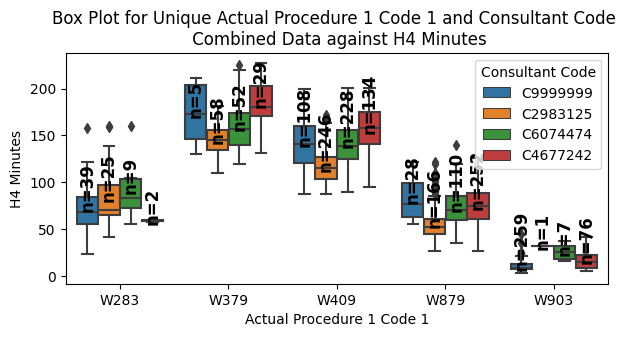

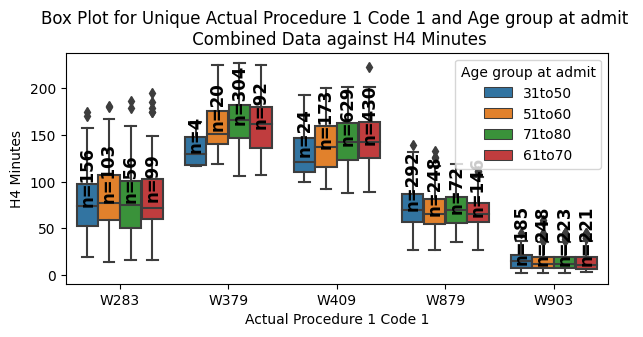

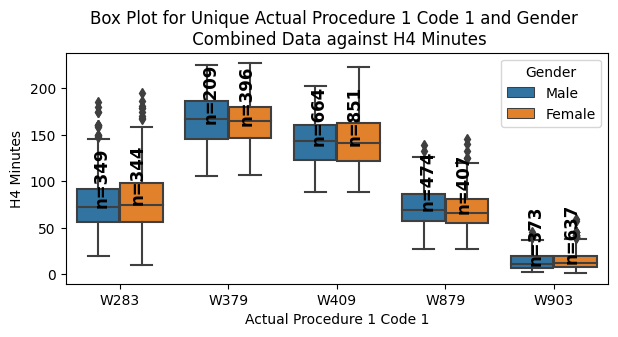

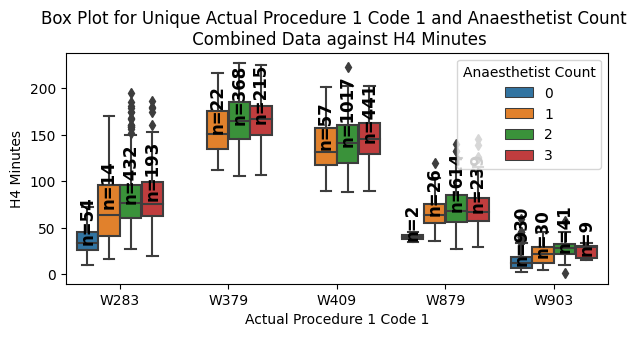

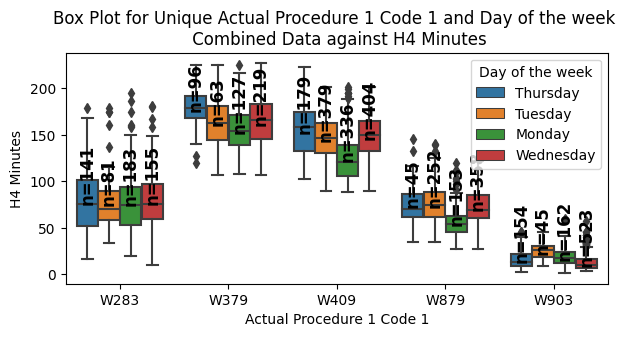

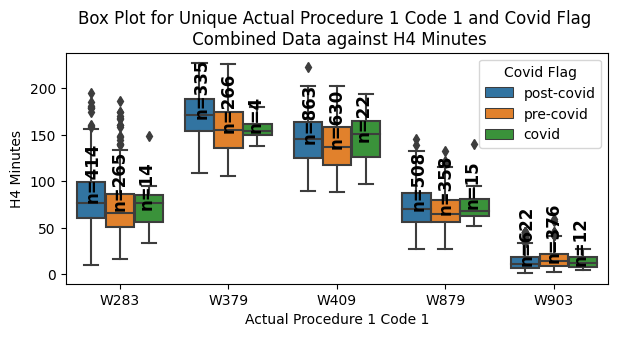

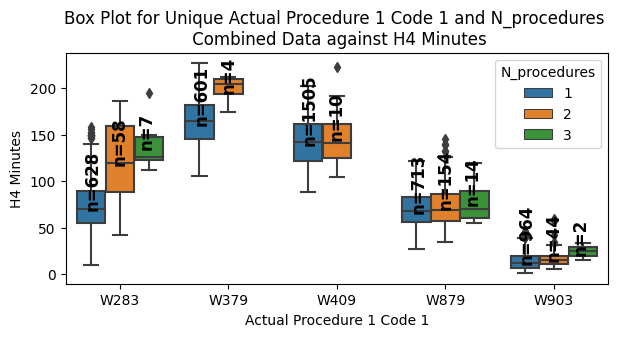

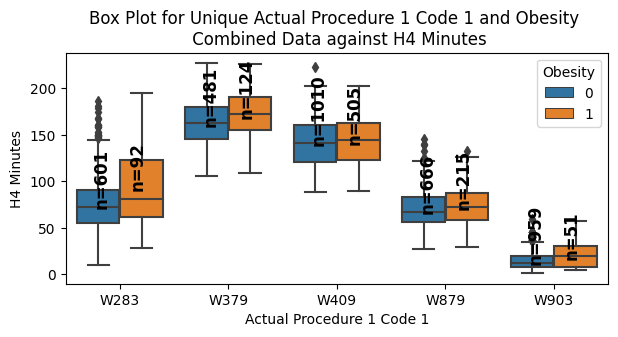

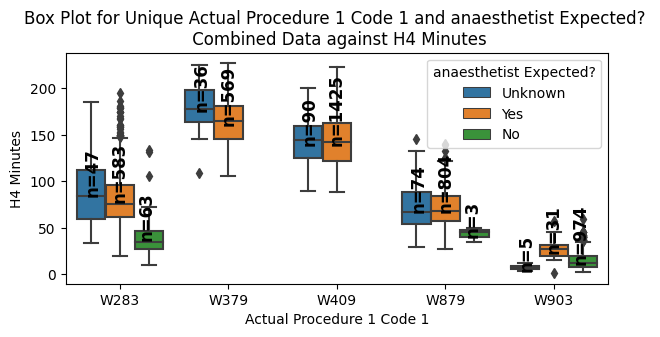

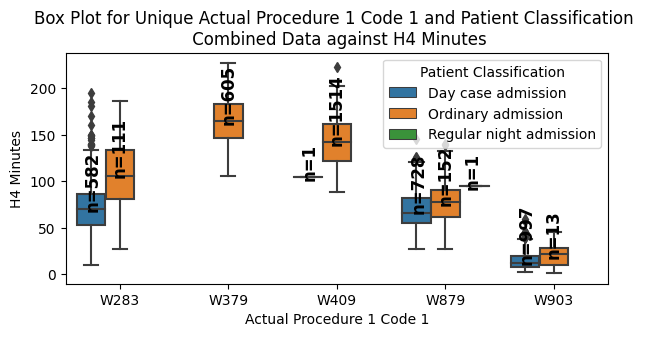

In [15]:
[generate_box_plot(preprocess_result[0][1], {'Actual Procedure 1 Code 1': 5, other_feature:4},
                   'H4 Minutes', (7, 3), (0.3,0.9), True) for other_feature in model_input_features_addi]

####  Modelling and Parameters

In [5]:
import torch.optim as optim
def get_model_training_related_parameters(model_type):
    
    if model_type == 'RegressionPipeline&ElNet':
        #settting variables for pipline model step and parameters for GridSearchCV
        #el_net_pipeline= ('elasticnet', ElasticNet())
        pipeline_param = {'elasticnet__l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
               'elasticnet__alpha':[ 0.0125, 0.025, 0.05, .125, .25, .5, 1., 2., 4.]}
        #parameters.extend([el_net_pipeline, pipeline_param])
        return pipeline_param

    elif model_type == 'NeuralNet':

        param_grid = {
        'learning_rates': [0.005, 0.01, 0.05],
        'num_epochs_list': [20, 30, 50, 80],
        #'hidden_dims': [(18), (18,18), (32), (64), (128), (32,32)  , (32,64), (64, 64), (128,64), (32,64,32), (64,64,64), (64,128,64)],
        'hidden_dims': [(18), (18,32), (32), (18,32,18), (128), (32,32) , (32,64), (64, 64), (128,64), (32,64,32), (64,64,64), (64,128,64)],
        'optimizer_classes': [optim.SGD, optim.Adam, optim.RMSprop],
        'batch_sizes': [32, 64, 128] 
        }
        return param_grid
        
    
    elif model_type == 'DecisionTreeRegressor':
        param_grid = {
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
        }
        return param_grid
        
        
    elif model_type == 'GradientBoostingRegressor':
        param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
        }
        return param_grid
    
    elif model_type == 'SupportVectorRegression':
        '''
        param_grid = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.2],
        'gamma': ['scale', 'auto', 0.1, 1]
        }
        '''
        param_grid = {
        'kernel': ['linear','rbf', 'poly'],
        'C': [0.1, 1],
        'epsilon': [0.01,0.1],
        'gamma': [ 'auto']
        }
        return param_grid
    
    elif model_type == 'BayesianRidge':
        param_grid = {
        'max_iter': [100, 200, 300],
        'alpha_1': [1e-6, 1e-5, 1e-4],
        'alpha_2': [1e-6, 1e-5, 1e-4],
        'lambda_1': [1e-6, 1e-5, 1e-4],
        'lambda_2': [1e-6, 1e-5, 1e-4],
        }
        return param_grid

In [6]:
from predictive_model_related_functions import model_training_nd_testing_results

### Performance on Testing for all data

Prediction Test Result 
 RMSE: 32.02
MAPE: 0.59
R2: 0.71


Text(0.5, 1.0, 'Consultant Planning Vs Real Time')

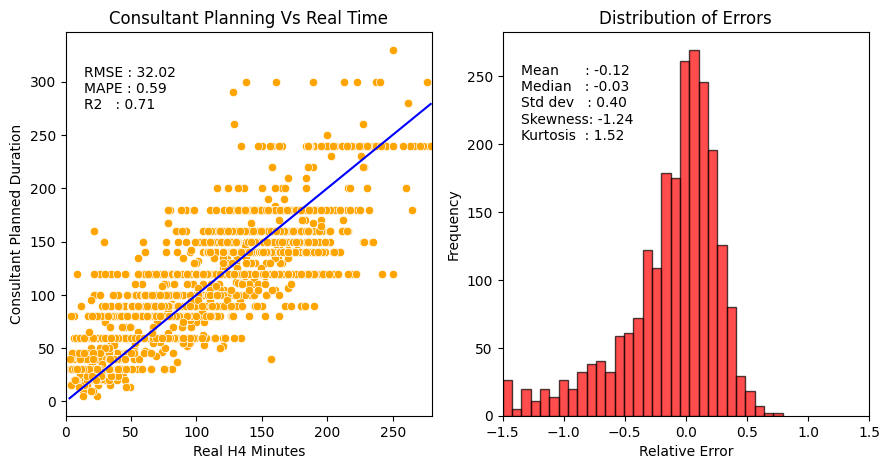

In [18]:
current_status = plot_with_performance_test(' ', test_data['H4 Minutes'],test_data['Planned Duration'], error_dist_plot = True)
#current_status[-2].set_size_inches(3.5, 3)
#current_status[-2].set_dpi(150)
current_status[-2].set_ylabel('Consultant Planned Duration')
#plot_results[-1].set_xlabel('Percentage Error')
current_status[-2].set_title('Consultant Planning Vs Real Time')
#plt.close()


Prediction Test Result 
 RMSE: 32.06
MAPE: 0.62
R2: 0.71


Text(0.5, 1.0, 'Consultant Planning')

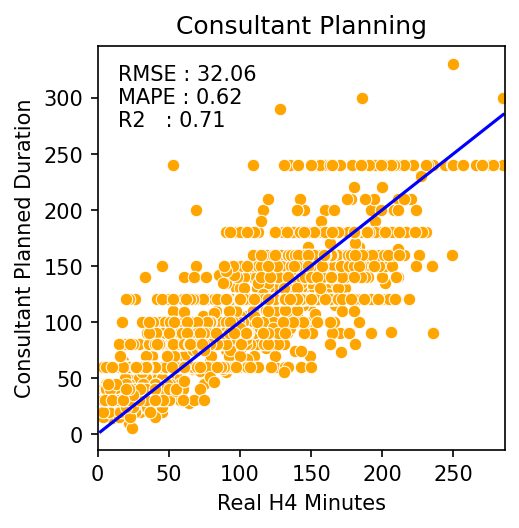

In [13]:
current_status = plot_with_performance_test(' ', test_data['H4 Minutes'],test_data['Planned Duration'], error_dist_plot = False)
current_status[-2].set_size_inches(3.5, 3.5)
current_status[-2].set_dpi(150)
current_status[-1].set_ylabel('Consultant Planned Duration')
#plot_results[-1].set_xlabel('Percentage Error')
current_status[-1].set_title('Consultant Planning')
#plt.close()

Prediction Test Result 
 RMSE: 23.27
MAPE: 0.29
R2: 0.85


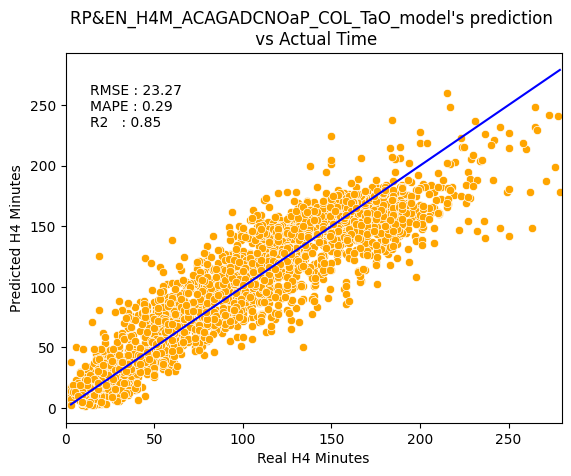

In [7]:
#model_type = 'NeuralNet'
model_type ='RegressionPipeline&ElNet'
#model_type = 'StochasticNormalDistribution'
#model_type = 'GradientBoostingRegressor'

model_retrain = False

training_related_parameters = get_model_training_related_parameters(model_type)

Trained_res, Test_res = model_training_nd_testing_results(model_type, training_related_parameters, target_data_types,model_input_features_ess+model_input_features_addi, dict_for_data_model_categorisation, IO_datasets, model_retrain, True, trained_model_dir=Trained_models_direc)

#Test_res[0][-3].set_size_inches((9,4))
#Test_res[0][-2].set_title('GBoost Prediction vs True H4 Minutes')
#Test_res[0][-1].set_title("GBoost Model's Error Distribution")
#Test_res[0][-1].set_size_inches((3,3))
#Test_res[0][-3].savefig('Output_files\GBoost Prediction all.png', dpi=150)

Starting to prepare for model Training: GBR_H4M_ACAGADCNOaP_COL_TaO_model
Training time: 862.66 seconds
Prediction Test Result 
 RMSE: 22.79
MAPE: 0.26
R2: 0.86


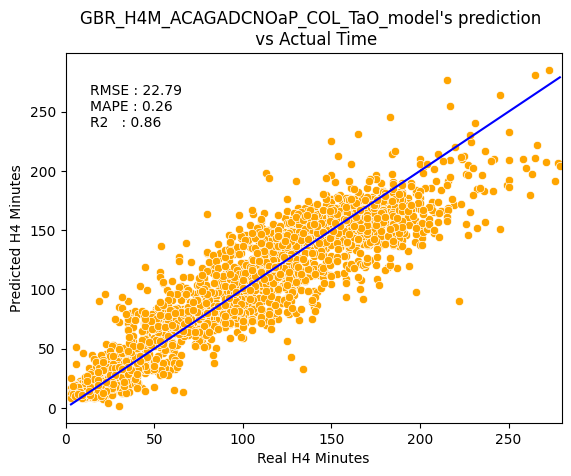

In [20]:
#model_type ='RegressionPipeline&ElNet'
#model_type = 'StochasticNormalDistribution'
model_type = 'GradientBoostingRegressor'

model_retrain = False

training_related_parameters = get_model_training_related_parameters(model_type)

Trained_res, Test_res = model_training_nd_testing_results(model_type, training_related_parameters, target_data_types,model_input_features_ess+model_input_features_addi, dict_for_data_model_categorisation, IO_datasets, model_retrain, True, trained_model_dir=Trained_models_direc)

#Test_res[0][-3].set_size_inches((9,4))
#Test_res[0][-2].set_title('GBoost Prediction vs True H4 Minutes')
#Test_res[0][-1].set_title("GBoost Model's Error Distribution")
#Test_res[0][-1].set_size_inches((3,3))
#Test_res[0][-3].savefig('Output_files\GBoost Prediction all.png', dpi=150)

Prediction Test Result 
 RMSE: 23.11
MAPE: 0.25
R2: 0.85


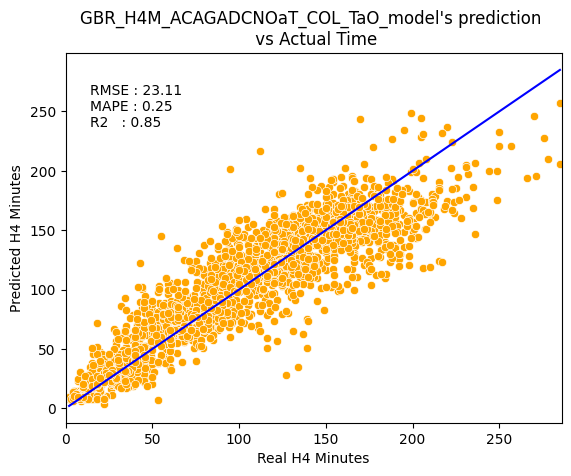

In [15]:
#model_type = 'NeuralNet'
#model_type ='RegressionPipeline&ElNet'
#model_type = 'StochasticNormalDistribution'
model_type = 'GradientBoostingRegressor'

model_retrain = False

training_related_parameters = get_model_training_related_parameters(model_type)

Trained_res, Test_res = model_training_nd_testing_results(model_type, training_related_parameters, target_data_types,model_input_features_ess+model_input_features_addi, dict_for_data_model_categorisation, IO_datasets, model_retrain, True, trained_model_dir=Trained_models_direc)

#Test_res[0][-3].set_size_inches((9,4))
#Test_res[0][-2].set_title('GBoost Prediction vs True H4 Minutes')
#Test_res[0][-1].set_title("GBoost Model's Error Distribution")
#Test_res[0][-1].set_size_inches((3,3))
#Test_res[0][-3].savefig('Output_files\GBoost Prediction all.png', dpi=150)

##### Shapley Analysis with GBOOST model

In [16]:
import shap

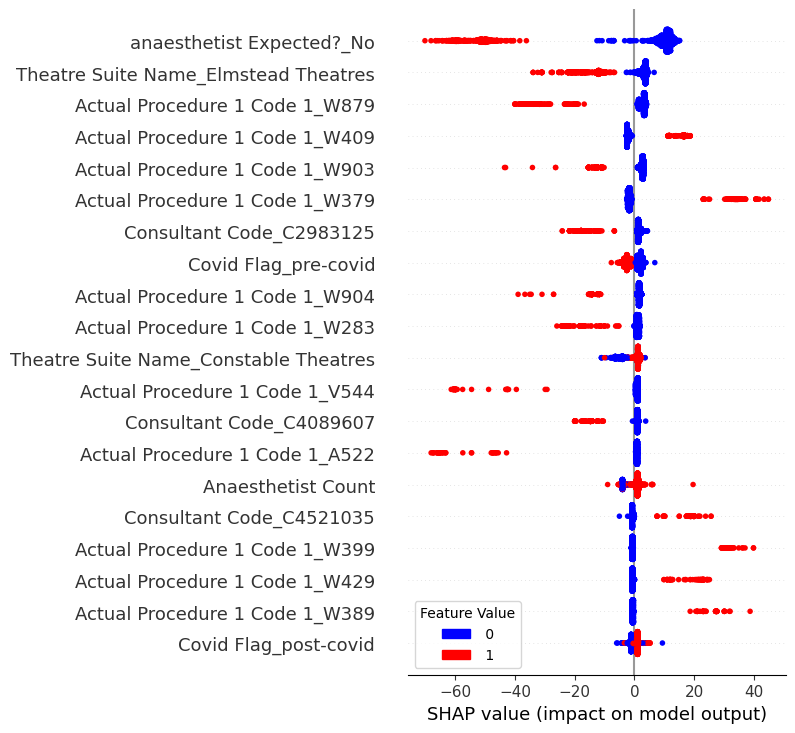

In [17]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, Normalize

explainer = shap.Explainer(Trained_res[0][1].best_estimator_)

test_data_encoded = Trained_res[0][-2].copy()
# Calculate SHAP values for a subset of the data (such as test set)
shap_values = explainer.shap_values(test_data_encoded)


# Define custom color mapping for binary features
def binary_color(val):
    if val == 1:
        return '#FF0000'  # Red for value 1
    elif val == 0:
        return '#0000FF'  # Blue for value 0
    else:
        return '#808080'  # Gray for any other value (though in your case it should only be 0 or 1)

# Update the color mapping for each feature
test_data_color = np.array([test_data_encoded.applymap(binary_color)])

# Set the figure size
plt.figure(figsize=(9, 7.5))  # Adjust as needed

# Plot the SHAP summary plot with custom color mapping
shap.summary_plot(shap_values, test_data_encoded, show=False, plot_size=None)

# Modify the color bar to only show two colors (one for 0, one for 1)
ax = plt.gca()

# Define custom colormap and normalization
cmap = ListedColormap(['#0000FF', '#FF0000'])  # Blue for low, Red for high
norm = Normalize(vmin=0, vmax=1)

# Define custom colors for "Low" and "High"
low_color = '#0000FF'  # Blue for Low (0)
high_color = '#FF0000'  # Red for High (1)

# Update the scatter plot colors to use the custom colormap and normalization
for collection in ax.collections:
    collection.set_cmap(cmap)
    collection.set_norm(norm)

fig = plt.gcf() 

for child in fig.get_children():
    if isinstance(child, plt.Axes) and child.get_label() == '<colorbar>':
        child.remove()

#cbar = plt.colorbar(ax.collections[0], orientation='vertical', ticks=[0, 1])
#cbar.ax.set_yticklabels(['0', '1'])  # Set custom tick labels

# Create custom legend
legend_handles = [
    Patch(color=low_color, label=' 0'),
    Patch(color=high_color, label=' 1')
]
plt.legend(handles=legend_handles, title='Feature Value', loc='lower left')

# Set the font size
plt.rcParams.update({'font.size': 13})

# Show the modified plot

#fig.savefig('Output_files\shap_summary_plot_6.png', bbox_inches='tight', dpi = 500)

plt.show()

Starting to prepare for model Training: BR_H4M_ACAGADCNOaP_COL_TaO_model
Training time: 332.41 seconds
Prediction Test Result 
 RMSE: 23.27
MAPE: 0.28
R2: 0.85


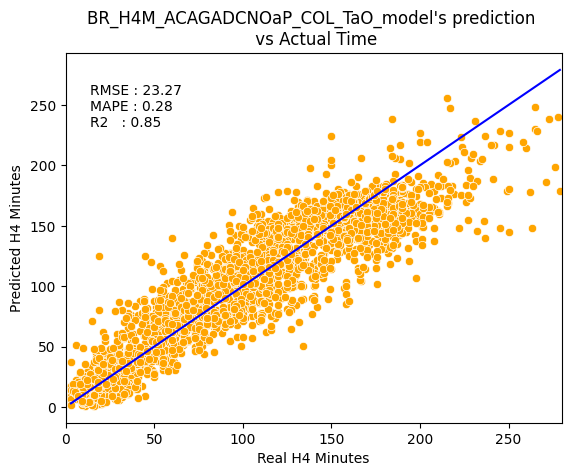

In [21]:
#model_type = 'NeuralNet'
#model_type ='RegressionPipeline&ElNet'
#model_type = 'StochasticNormalDistribution'
model_type = 'BayesianRidge'

model_retrain = False

training_related_parameters = get_model_training_related_parameters(model_type)

Trained_res, Test_res = model_training_nd_testing_results(model_type, training_related_parameters, target_data_types,model_input_features_ess+model_input_features_addi, dict_for_data_model_categorisation, IO_datasets, model_retrain, True, trained_model_dir=Trained_models_direc)

#Test_res[0][-3].set_size_inches((9,4))
#Test_res[0][-2].set_title('GBoost Prediction vs True H4 Minutes')
#Test_res[0][-1].set_title("GBoost Model's Error Distribution")
#Test_res[0][-1].set_size_inches((3,3))
#Test_res[0][-3].savefig('Output_files\GBoost Prediction all.png', dpi=150)

#### Training all models

In [18]:
from predictive_model_related_functions import identify_corresponding_feature, predict_with_model

Prediction Test Result 
 RMSE: 23.29
MAPE: 0.24
R2: 0.84
Prediction Test Result 
 RMSE: 23.29
MAPE: 0.24
R2: 0.84
Prediction Test Result 
 RMSE: 28.79
MAPE: 0.27
R2: 0.76
Prediction Test Result 
 RMSE: 28.79
MAPE: 0.27
R2: 0.76
Prediction Test Result 
 RMSE: 23.11
MAPE: 0.25
R2: 0.85
Prediction Test Result 
 RMSE: 23.11
MAPE: 0.25
R2: 0.85
Prediction Test Result 
 RMSE: 23.27
MAPE: 0.25
R2: 0.84
Prediction Test Result 
 RMSE: 23.27
MAPE: 0.25
R2: 0.84
Prediction Test Result 
 RMSE: 22.45
MAPE: 0.22
R2: 0.85
Prediction Test Result 
 RMSE: 22.45
MAPE: 0.22
R2: 0.85


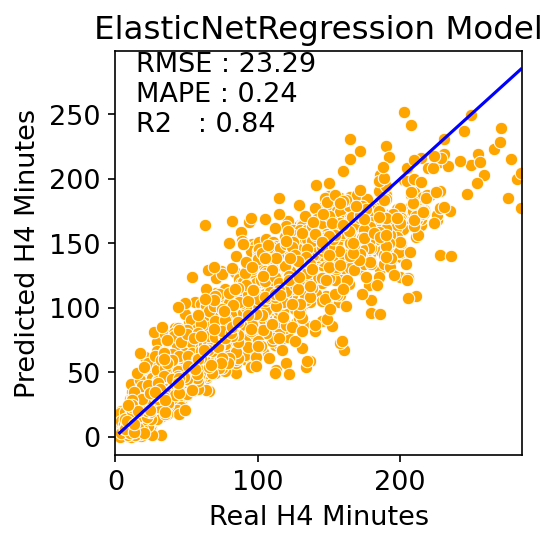

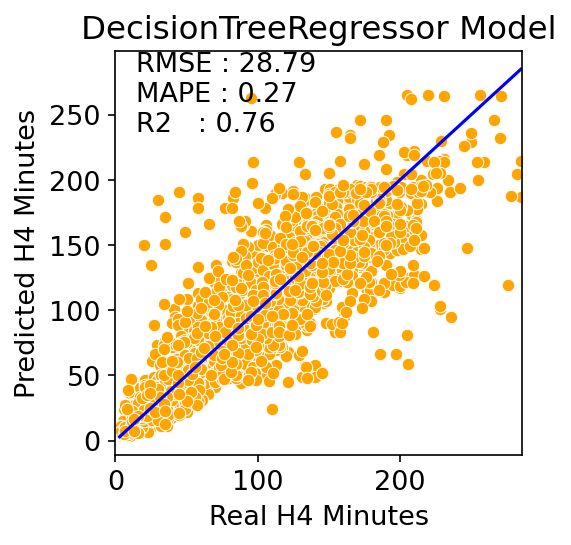

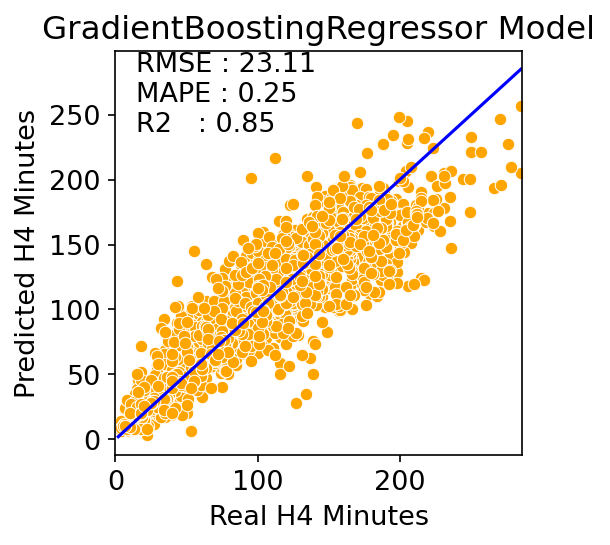

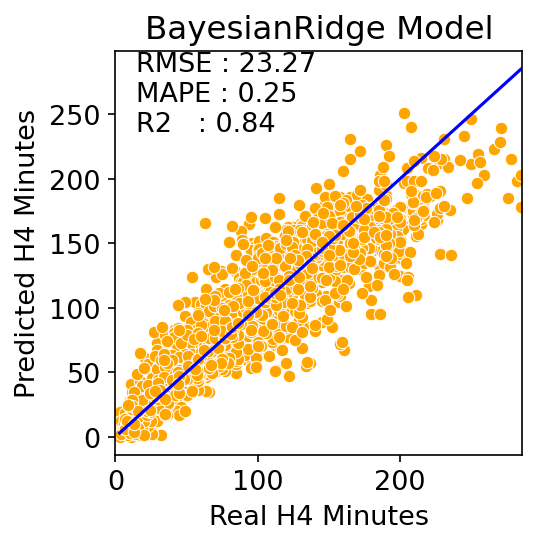

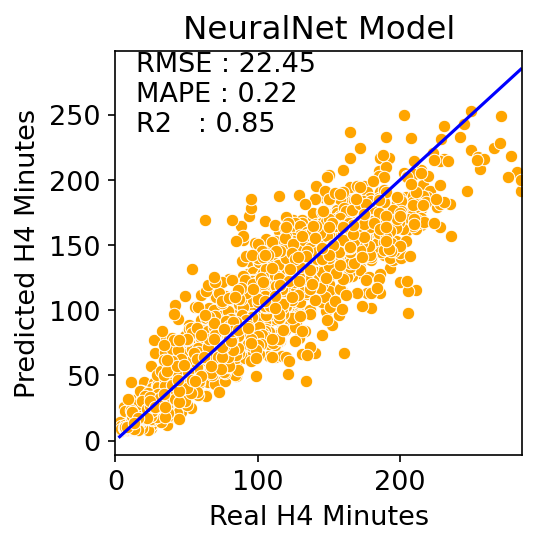

In [19]:
models_types = ['RegressionPipeline&ElNet','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']
#models_types = ['RegressionPipeline&ElNet','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge']
#models_types = ['RegressionPipeline&ElNet','RegressionPipeline&ElNet','RegressionPipeline&ElNet']

models_tags = ['ElasticNetRegression','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']

model_retrain = False

#collected_axes =[]

collected_axes = [current_status[-1] for _ in range(1)]
#[current_status[-1]]

collected_figure = [current_status[-2] for _ in range(1)]

for idx, model_type in enumerate(models_types):
        
    training_related_parameters = get_model_training_related_parameters(model_type)
    
    Trained_res, _ = model_training_nd_testing_results(model_type, training_related_parameters, target_data_types,model_input_features_ess+model_input_features_addi, dict_for_data_model_categorisation, IO_datasets, model_retrain, False, residual_plot = False, trained_model_dir= Trained_models_direc)

    procedure_code_data = identify_corresponding_feature(Trained_res[0][0],'Actual Procedure 1 Code 1',
                                                    dict_for_data_model_categorisation, {},Trained_res[0][-2])
    y_predict = predict_with_model(model_type,Trained_res[0][1], Trained_res[0][-2]) if model_type != 'BayesianRidge' else predict_with_model(model_type,Trained_res[0][1], Trained_res[0][-2])[0]
    
    df1 = pd.DataFrame({'Actual Procedure 1 Code 1': procedure_code_data, 
                        'Predicted H4 Minutes': y_predict,
                       'H4 Minutes' : Trained_res[0][-1]})

    #print(len(y_predict))
 
    [temp_fig, temp_axis] =  plot_with_performance_test(' ', df1['H4 Minutes'],df1['Predicted H4 Minutes'])[-2:]
   
    temp_axis.set_title(f'{models_tags[idx]} Model')
    temp_fig.set_size_inches(3.5, 3.5)
    temp_fig.set_dpi(150)
    collected_axes.append(temp_axis)

    collected_figure.append(temp_fig)
    #collected_figure.append(Test_res[0][-2])

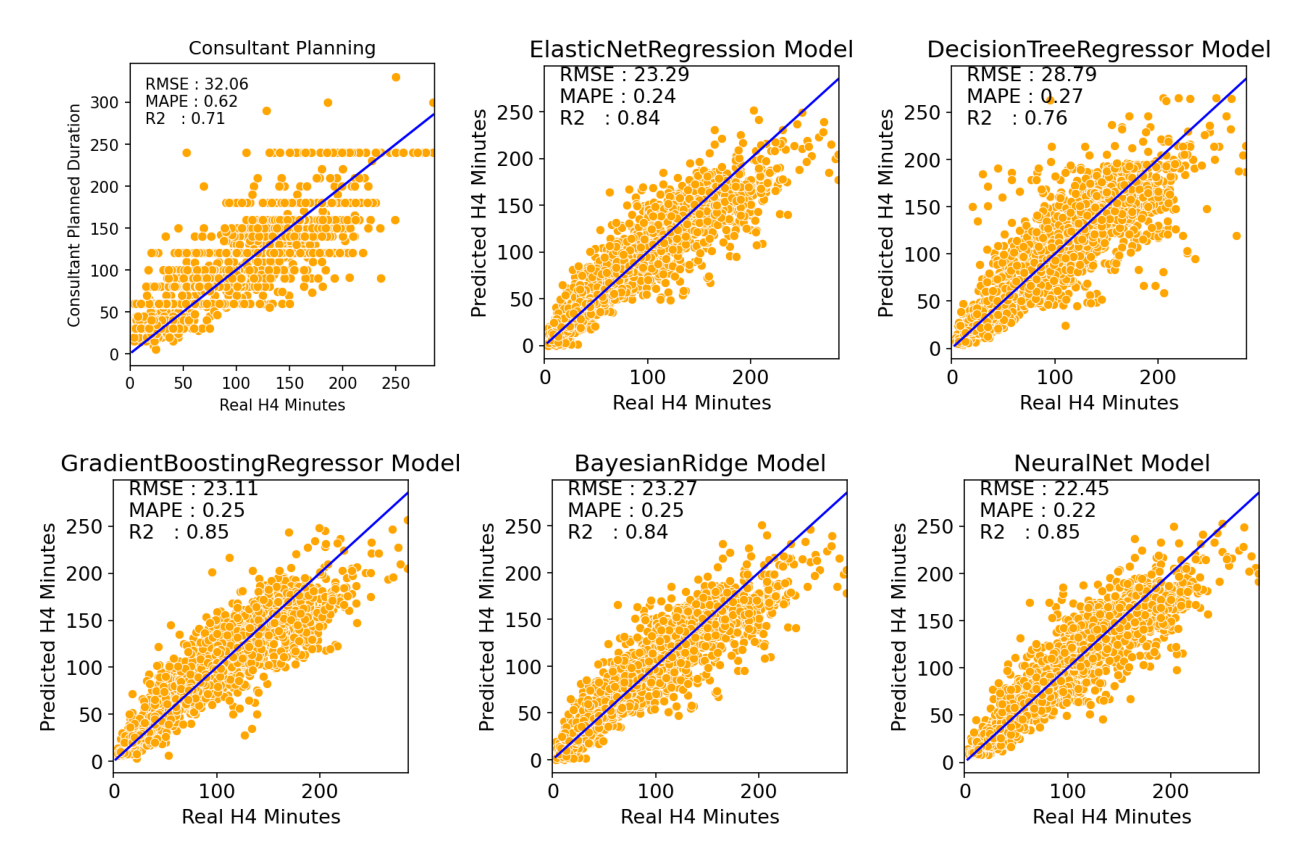

In [20]:
import matplotlib.pyplot as plt
new_fig, axes = plt.subplots(2,3, figsize=(6.5, 3.5),  gridspec_kw={'wspace': -0.4, 'hspace': 0.05}, dpi = 300)  # Adjust the size as needed

model_count = 0

#collected_axes = [current_status[-2] for _ in range(6)]
#collected_axes = [Test_res[0][-2] for _ in range(6)]
#collected_axes = [current_status[-1] for _ in range(1)]
#[current_status[-1]]

#collected_figure = [current_status[-2] for _ in range(1)]

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        #new_axis = axes[i,j]
        axes[i,j].set_axis_off()
        
        #old_axis = collected_axes[model_count]
        #old_axis.set_title(f'{models_types[model_count]} Model')
        axes[i,j].imshow(collected_axes[model_count].figure.canvas.buffer_rgba(), origin='upper')
        #collected_figure[model_count].set_size_inches(3, 3)
        #axes[i,j].imshow(collected_figure[model_count].canvas.buffer_rgba(), origin='upper')
        model_count+=1
        # Close the new figure to release resources
#plt.tight_layout()
plt.show()


In [1]:
#new_fig.savefig(r'Output_files\All Models on Testing data_5.png', dpi=1000)

#### Categorical Modelling

##### Categorsing on essential features while additional features will be added based on the data-size 

In [21]:
from predictive_model_related_functions import category_based_modelling

In [22]:
#help(category_based_modelling)

In [27]:
model_type = 'RegressionPipeline&ElNet'

training_related_parameters = get_model_training_related_parameters(model_type)

min_data_req_for_further_catego = {'Actual Procedure 1 Code 1': 190}

model_retrain = False

force_one_hot_encoding_cols = ['N_procedures']

essen_data_categ = {'Hosp':'COL','Specialty':'Trauma and Orthopaedics'}
#Z_score_threshold_for_outlier_removal = 1.5
min_count_threshold_for_filtering = {'Actual Procedure 1 Code 1':5, 'Consultant Code':25}

Z_score_for_outlier_removal = {'overall':2.8, 'Actual Procedure 1 Code 1':1.8}

Trained_Test_result = category_based_modelling(data_file, essen_data_categ, model_input_features_ess, model_input_features_addi,
                                               target_data_types, min_count_threshold_for_filtering, Z_score_for_outlier_removal, force_one_hot_encoding_cols, model_type,training_related_parameters ,
                                               min_data_req_for_further_catego, model_retrain, infrequent_data_replacement = infrequent_data_replacement, skip_modelling_if_no_categorisation = False)


model categorised for dict_values(['COL', 'Trauma and Orthopaedics', 'W409']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 21.74
MAPE: 0.12
R2: 0.35
model categorised for dict_values(['COL', 'Trauma and Orthopaedics', 'W903']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 6.29
MAPE: 0.47
R2: 0.56
model categorised for dict_values(['COL', 'Trauma and Orthopaedics', 'W879']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 17.31
MAPE: 0.24

In [24]:
y_real = [ ]
y_pred = []
coloring_features_labels = []
for train_test_res in Trained_Test_result:
    train_res = train_test_res[0][0]
    #y_real.append(train_res[-1])
    y_real.extend(train_res[-1])
    if model_type != 'BayesianRidge':
        y_pred.extend(list(predict_with_model(model_type, train_res[1], train_res[-2])))
    else:
        y_pred.extend(list(predict_with_model(model_type, train_res[1], train_res[-2])[0]))
        
    coloring_features_labels.extend(identify_corresponding_feature(train_res[0], 'Actual Procedure 1 Code 1', essen_data_categ, min_data_req_for_further_catego, train_res[-2]))

df2 = pd.DataFrame({'Actual Procedure 1 Code 1': coloring_features_labels, 
                'Predicted H4 Minutes': y_pred,
               'H4 Minutes' : y_real})


Prediction Test Result 
 RMSE: 22.27
MAPE: 0.24
R2: 0.86


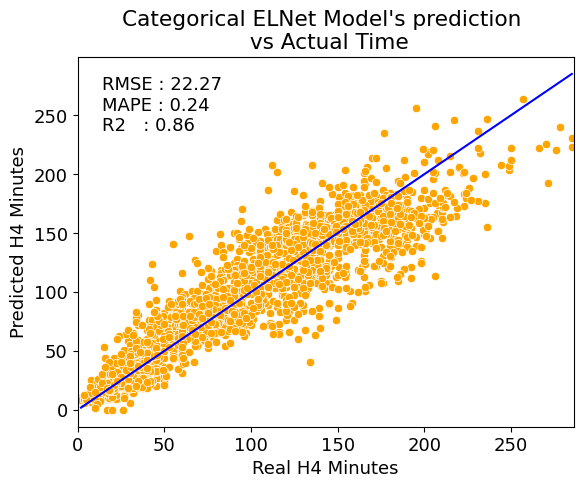

In [25]:
from predictive_model_related_functions import plot_with_performance_test
categ_plot_results = plot_with_performance_test('Categorical ELNet Model', df2['H4 Minutes'], df2['Predicted H4 Minutes'],error_dist_plot = False)


In [26]:
from predictive_model_related_functions import model_training_nd_testing_results, train_test_split

def category_based_modelling(data_file, essential_categ, essential_features, additonal_features, 
                             target_data_types, min_categorical_count_threshold, Z_score_threshold_for_outlier_removal,
                             extra_one_hot_encoding_cols, model_type, training_related_parameters, min_data_reqs, models_retrain, infrequent_data_replacement = None, trained_model_dir = None,
                             train_test_data = None, skip_modelling_if_no_categorisation = False, similar_cols_for_encoding = None, log_transform=False):
    
    output = []
    # feature considered for further categorisation
    feature_for_catego_further = list(essential_features + additonal_features)[0]
    
     # Preprocess the dataset
    if train_test_data is None:
        preprocessed_result = preprocess_dataset(data_file, essential_categ, essential_features, additonal_features,
                                                 target_data_types, {}, min_categorical_count_threshold, Z_score_threshold_for_outlier_removal, infrequent_data_replacement = infrequent_data_replacement)
        preprocessed_datasets = [result[1] for result in preprocessed_result]
    
        #lets sort the preprocess dataset on the basis of next_feature count
        #preprocessed_datasets = [df1.sort_values(by= feature_for_catego_further, key=lambda x: x.map(x.value_counts()), ascending=False) for df1 in preprocessed_datasets]

        train_test_data_temp = train_test_split(preprocessed_datasets[0], test_size = 0.2, random_state=42)
    else:
        train_test_data_temp = train_test_data.copy()
        train_test_data_temp = [_[essential_features + additonal_features+target_data_types] for _ in train_test_data_temp]
        #the next features count for the current feature categorised data
        
    if feature_for_catego_further in min_data_reqs:
        
        next_features_count = pd.concat(train_test_data_temp, axis = 0)[feature_for_catego_further].value_counts()
        
        #print(next_features_count[next_features_count >= min_data_reqs[feature_for_catego_further]])
        
        #Building model with the categorisation that satisfy the minimum data conditions
        for index, value in next_features_count[next_features_count >= min_data_reqs[feature_for_catego_further]].items():
            
            new_categor = essential_categ.copy()
            
            #adding the data to the data segmentation dictinary 
            new_categor[feature_for_catego_further] = index
            #print(f'Further categorisation happens with {feature_for_catego_further} for {index} as count is {value}')
            
            new_min_data_reqs = min_data_reqs.copy()
            
            new_min_categorical_count_threshold = min_categorical_count_threshold.copy()
            
            #removing the minimum data requirements for the categorised column as its redundant
            if feature_for_catego_further in new_min_categorical_count_threshold:
                del new_min_categorical_count_threshold[feature_for_catego_further]
                
            new_z_score_threshold = Z_score_threshold_for_outlier_removal.copy()
            
            if isinstance(Z_score_threshold_for_outlier_removal, dict) and feature_for_catego_further in Z_score_threshold_for_outlier_removal:
                
                new_z_score_threshold['overall'] = new_z_score_threshold[feature_for_catego_further]
                del new_z_score_threshold[feature_for_catego_further]

            new_train_test_data = [train_test_data_temp[0][train_test_data_temp[0][feature_for_catego_further] == index],
                                  train_test_data_temp[1][train_test_data_temp[1][feature_for_catego_further] == index]]

            output = output + category_based_modelling(data_file, new_categor, [feat for feat in essential_features if feat!=feature_for_catego_further],  [feat for feat in additonal_features if feat!=feature_for_catego_further], 
                                                       target_data_types, new_min_categorical_count_threshold, new_z_score_threshold, extra_one_hot_encoding_cols, model_type,  
                                                       training_related_parameters, new_min_data_reqs, models_retrain, trained_model_dir = trained_model_dir,
                                                       train_test_data = new_train_test_data, skip_modelling_if_no_categorisation = False, similar_cols_for_encoding = similar_cols_for_encoding, log_transform=log_transform)  

        # Filter data that doesn't meet the minimum requirements
        leftover_1st_feature_data = next_features_count[next_features_count < min_data_reqs[feature_for_catego_further]].index.tolist()
        
        #print(f'leftover features data are {leftover_1st_feature_data}')
        
        #The data not being able to get categorised will be dealt together and the data considered for categorical modelling will be removed
        if leftover_1st_feature_data:
            #print(preprocess_datasets[0][feature_for_catego_further])
            #preprocessed_datasets = [df[df[feature_for_catego_further].isin(leftover_1st_feature_data)] for df in preprocessed_datasets]
            train_test_data_temp = [df[df[feature_for_catego_further].isin(leftover_1st_feature_data)] for df in train_test_data_temp]
    
    if not skip_modelling_if_no_categorisation and len(train_test_data_temp[0]) >=10:
    
        model_input_features = essential_features + additonal_features
        
        #preprocessed_datasets = [df[model_input_features+[df.columns[-1]]] for df in preprocessed_datasets]
        
        #print(preprocess_datasets[0])
        
        IO_datasets = prepare_IO_dataset([pd.concat(train_test_data_temp, axis=0)], 'one-hot', [col for col in extra_one_hot_encoding_cols if col in model_input_features], similar_cols_for_encoding = similar_cols_for_encoding)

        train_test_IO_datasets = [[[IO_data[IO_data.index.isin(train_test.index)] for IO_data in IO_datasets[0]] 
                                  for train_test in train_test_data_temp]]
        
        
        if model_type == 'StochasticNormalDistribution':
            IO_datasets = [[df.iloc[:,:-1], df.iloc[:,-1]] for df in preprocessed_datasets]

        #training_related_parameters = get_model_training_related_parameters(model_type)
        
        print(f'model categorised for {essential_categ.values()} with input features {model_input_features}')
        
        Trained_res, Test_res = model_training_nd_testing_results(model_type, training_related_parameters,
                                                                  target_data_types, model_input_features, essential_categ, IO_datasets, models_retrain, False, train_test_IO_datasets = train_test_IO_datasets, categorised_modelling = True,  log_transform = log_transform, trained_model_dir = trained_model_dir)
        output = output + [[Trained_res, Test_res]]
    
    return output


### Non-parametric Statistical test for model's performances

#### Friedman test (F1-score)

In [24]:
# data collecting
abs_PE_for_test_data = {}
real_H4_Minutes = {}
predicted_h4_minutes = {}

for idx, model_type in enumerate(models_types):
        
    training_related_parameters = get_model_training_related_parameters(model_type)
    
    Trained_res, _ = model_training_nd_testing_results(model_type, training_related_parameters, target_data_types,model_input_features_ess+model_input_features_addi, dict_for_data_model_categorisation, IO_datasets, model_retrain, False, residual_plot = False, trained_model_dir= Trained_models_direc)

    procedure_code_data = identify_corresponding_feature(Trained_res[0][0],'Actual Procedure 1 Code 1',
                                                    dict_for_data_model_categorisation, {},Trained_res[0][-2])
    y_predict = predict_with_model(model_type,Trained_res[0][1], Trained_res[0][-2]) if model_type != 'BayesianRidge' else predict_with_model(model_type,Trained_res[0][1], Trained_res[0][-2])[0]
    
    
    abs_PE_for_test_data[model_type] = np.abs(y_predict - Trained_res[0][-1])/Trained_res[0][-1]
                       
    real_H4_Minutes[model_type] = Trained_res[0][-1]
    predicted_h4_minutes[model_type] = y_predict
    
    print(len(y_predict))

abs_PE_for_test_data_df = pd.DataFrame(abs_PE_for_test_data)
real_H4_Minutes_df = pd.DataFrame(real_H4_Minutes)
predicted_h4_minutes_df = pd.DataFrame(predicted_h4_minutes)
abs_PE_for_test_data_df['Base Model'] = np.abs(test_data['Planned Duration'] - test_data['H4 Minutes'])/test_data['H4 Minutes']
predicted_h4_minutes_df['Base Model'] = test_data['Planned Duration'].reset_index(drop = True)

Prediction Test Result 
 RMSE: 23.29
MAPE: 0.24
R2: 0.84
2181
Prediction Test Result 
 RMSE: 28.79
MAPE: 0.27
R2: 0.76
2181
Prediction Test Result 
 RMSE: 23.65
MAPE: 0.24
R2: 0.84
2181
Prediction Test Result 
 RMSE: 23.27
MAPE: 0.25
R2: 0.84
2181
Prediction Test Result 
 RMSE: 22.45
MAPE: 0.22
R2: 0.85
2181


In [28]:
#test_data.to_csv('Test_data.csv')
#abs_PE_for_test_data_df.to_csv('Test_data_abs_PE_case_wise_all_models.csv')
#predicted_h4_minutes_df.to_csv('Predicted_H4_minutes_case_wise_all_models.csv')

In [25]:
abs_PE_for_test_data_df = abs_PE_for_test_data_df.reset_index(drop = True)

In [26]:
abs_PE_ranked = abs_PE_for_test_data_df.T.rank(method= 'dense', ascending=True).mean(axis=1).sort_values()
abs_PE_ranked

NeuralNet                    3.169188
GradientBoostingRegressor    3.217790
RegressionPipeline&ElNet     3.374599
BayesianRidge                3.419991
DecisionTreeRegressor        3.653829
Base Model                   4.141220
dtype: float64

In [41]:
abs_PE_ranked

NeuralNet                    3.114809
GradientBoostingRegressor    3.354964
RegressionPipeline&ElNet     3.364947
BayesianRidge                3.396007
DecisionTreeRegressor        3.564060
Base Model                   4.186911
dtype: float64

In [27]:
#predicted_h4_minutes_df
from scipy import stats
#['RegressionPipeline&ElNet','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']
print(stats.friedmanchisquare(abs_PE_for_test_data_df['RegressionPipeline&ElNet'], abs_PE_for_test_data_df['DecisionTreeRegressor'], abs_PE_for_test_data_df['GradientBoostingRegressor'], abs_PE_for_test_data_df['BayesianRidge'],abs_PE_for_test_data_df['NeuralNet'] ))

FriedmanchisquareResult(statistic=98.3031636863816, pvalue=2.2595599294421213e-20)


In [28]:
import scikit_posthocs as sp
pairwise = sp.posthoc_conover_friedman(abs_PE_for_test_data_df.to_numpy(), p_adjust='fdr_tsbh')
pairwise.index = abs_PE_for_test_data_df.columns
pairwise.columns = abs_PE_for_test_data_df.columns
pairwise

RegressionPipeline&ElNet  DecisionTreeRegressor  \
RegressionPipeline&ElNet               1.000000e+00           1.416556e-07   
DecisionTreeRegressor                  1.416556e-07           1.000000e+00   
GradientBoostingRegressor              7.028222e-04           1.387035e-15   
BayesianRidge                          5.524301e-02           5.650215e-06   
NeuralNet                              3.656431e-05           1.024010e-18   
Base Model                             5.819343e-43           8.550912e-19   

                           GradientBoostingRegressor  BayesianRidge  \
RegressionPipeline&ElNet                7.028222e-04   5.524301e-02   
DecisionTreeRegressor                   1.387035e-15   5.650215e-06   
GradientBoostingRegressor               1.000000e+00   4.341462e-05   
BayesianRidge                           4.341462e-05   1.000000e+00   
NeuralNet                               5.394705e-02   1.292320e-06   
Base Model                              3.480654e-61   2.122064e-38   

                              NeuralNet    Base Model  
RegressionPipeline&ElNet   3.656431e-05  5.819343e-43  
DecisionTreeRegressor      1.024010e-18  8.550912e-19  
GradientBoostingRegressor  5.394705e-02  3.480654e-61  
BayesianRidge              1.292320e-06  2.122064e-38  
NeuralNet                  1.000000e+00  2.871455e-67  
Base Model                 2.871455e-67  1.000000e+00

### Performance Testing for selected data

In [29]:
import string

selected_procedures_nd_orders = ['W409', 'W879', 'W903', 'W283', 'W379', 'W889', 'W904', 'W429', 'A651', 'W399', 'W629']

pseudo_procedure_codes = [f'Proce {letter}' for letter in list(string.ascii_uppercase)[0:len(selected_procedures_nd_orders)]]
#pseudo_procedure_code

In [31]:
import pickle
with open('label_mapping.pickle', 'rb') as f1:
    color_codes = pickle.load(f1)

In [32]:
[code for code in selected_procedures_nd_orders if code not in color_codes]

[]

In [33]:
order_mapping = {value1: value2 for value1, value2 in zip(selected_procedures_nd_orders, pseudo_procedure_codes)}

In [34]:
#order_mapping

Prediction Test Result 
 RMSE: 31.2
MAPE: 0.65
R2: 0.71


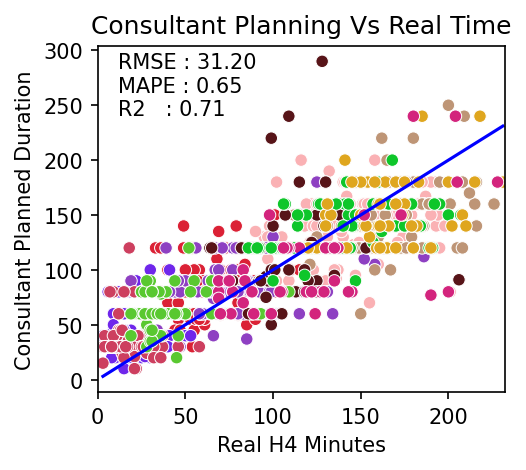

In [36]:
test_data_selected = test_data[test_data['Actual Procedure 1 Code 1'].isin(selected_procedures_nd_orders)].copy()

# Apply the sorting order using the key parameter
test_data_selected['Pseudo Procedure Code'] = test_data_selected['Actual Procedure 1 Code 1'].map(order_mapping)

sorted_df = test_data_selected.sort_values(by='Pseudo Procedure Code')
#sorted_df = sorted_df[sorted_df['Procedure Codes'].isin(selected_procedures_nd_orders)]
# Drop the SortOrder column if needed
#sorted_df.drop('SortOrder', axis=1, inplace=True)
current_status = plot_with_performance_test(' ', sorted_df['H4 Minutes'],sorted_df['Planned Duration'],sorted_df['Actual Procedure 1 Code 1'], color_codes, 11, error_dist_plot = False)
current_status[-2].set_size_inches(3.5, 3)
current_status[-2].set_dpi(150)
current_status[-1].set_ylabel('Consultant Planned Duration')
#plot_results[-1].set_xlabel('Percentage Error')
current_status[-1].set_title('Consultant Planning Vs Real Time')
current_status[-1].get_legend().set_visible(False)
#plt.close()


In [313]:
#test_data_selected

Prediction Test Result 
 RMSE: 23.29
MAPE: 0.24
R2: 0.84
Prediction Test Result 
 RMSE: 20.85
MAPE: 0.25
R2: 0.87
Prediction Test Result 
 RMSE: 28.79
MAPE: 0.27
R2: 0.76
Prediction Test Result 
 RMSE: 24.83
MAPE: 0.26
R2: 0.81
Prediction Test Result 
 RMSE: 23.65
MAPE: 0.24
R2: 0.84
Prediction Test Result 
 RMSE: 20.06
MAPE: 0.23
R2: 0.88
Prediction Test Result 
 RMSE: 23.27
MAPE: 0.25
R2: 0.84
Prediction Test Result 
 RMSE: 20.85
MAPE: 0.25
R2: 0.87
Prediction Test Result 
 RMSE: 22.45
MAPE: 0.22
R2: 0.85
Prediction Test Result 
 RMSE: 20.1
MAPE: 0.22
R2: 0.88


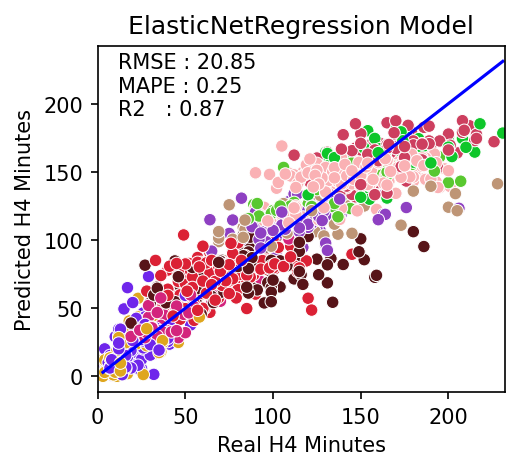

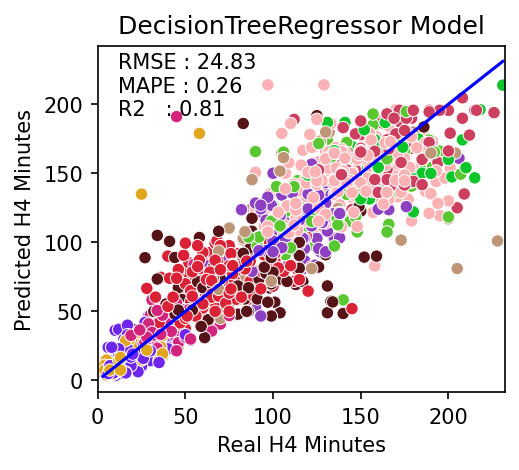

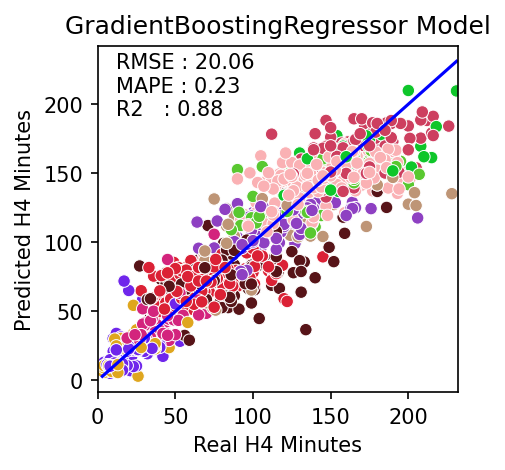

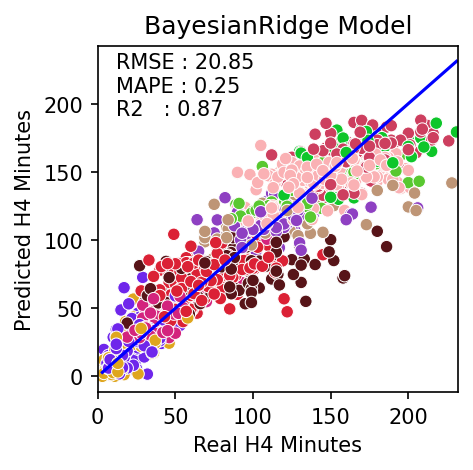

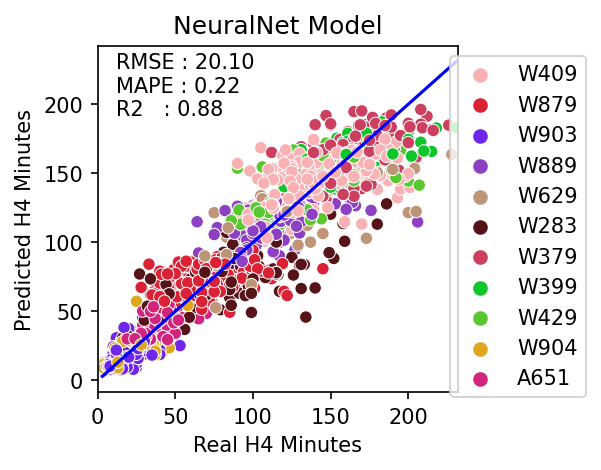

In [38]:
from predictive_model_related_functions import identify_corresponding_feature, predict_with_model

models_types = ['RegressionPipeline&ElNet','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']
#models_types = ['RegressionPipeline&ElNet','RegressionPipeline&ElNet','RegressionPipeline&ElNet']

models_tags = ['ElasticNetRegression','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']

model_retrain = False

#collected_axes =[]

collected_axes = [current_status[-1]]
#[current_status[-1]]

collected_figure = [current_status[-2]]

for idx, model_type in enumerate(models_types):
        
    training_related_parameters = get_model_training_related_parameters(model_type)
        
    Trained_res, _ = model_training_nd_testing_results(model_type, training_related_parameters, target_data_types,model_input_features_ess+model_input_features_addi, dict_for_data_model_categorisation, IO_datasets, model_retrain, False, residual_plot = False)

    procedure_code_data = identify_corresponding_feature(Trained_res[0][0],'Actual Procedure 1 Code 1',
                                                    dict_for_data_model_categorisation, {},Trained_res[0][-2])
    y_predict = predict_with_model(model_type,Trained_res[0][1], Trained_res[0][-2]) if model_type != 'BayesianRidge' else predict_with_model(model_type,Trained_res[0][1], Trained_res[0][-2])[0]
    df1 = pd.DataFrame({'Actual Procedure 1 Code 1': procedure_code_data, 
                        'Predicted H4 Minutes': y_predict,
                       'H4 Minutes' : Trained_res[0][-1]})
    
    data_selected = df1[df1['Actual Procedure 1 Code 1'].isin(selected_procedures_nd_orders)].copy()

    # Apply the sorting order using the key parameter
    #data_selected['Pseudo Procedure Code'] = data_selected['Actual Procedure 1 Code 1'].map(order_mapping)
    
    #sorted_df = data_selected.sort_values(by='Pseudo Procedure Code')
    
    #ordered_labels = preprocess_result[0][1]['Actual Procedure 1 Code 1'].value_counts().index.tolist()
    [temp_fig, temp_axis] = plot_with_performance_test(' ', data_selected['H4 Minutes'],data_selected['Predicted H4 Minutes'],data_selected['Actual Procedure 1 Code 1'], color_codes, 11, error_dist_plot = False)[-2:]

    temp_axis.set_title(f'{models_tags[idx]} Model')
    if idx < 2:
        temp_fig.set_size_inches(3.5, 3)
    else:
        temp_fig.set_size_inches(3.1, 3)
    temp_fig.set_dpi(150)
    if idx <len(models_types)-1:
        temp_axis.get_legend().set_visible(False)
    else:
        temp_axis.legend(bbox_to_anchor=(0.95, 1), loc='upper left')

    collected_axes.append(temp_axis)

    collected_figure.append(temp_fig)
    #collected_figure.append(Test_res[0][-2])

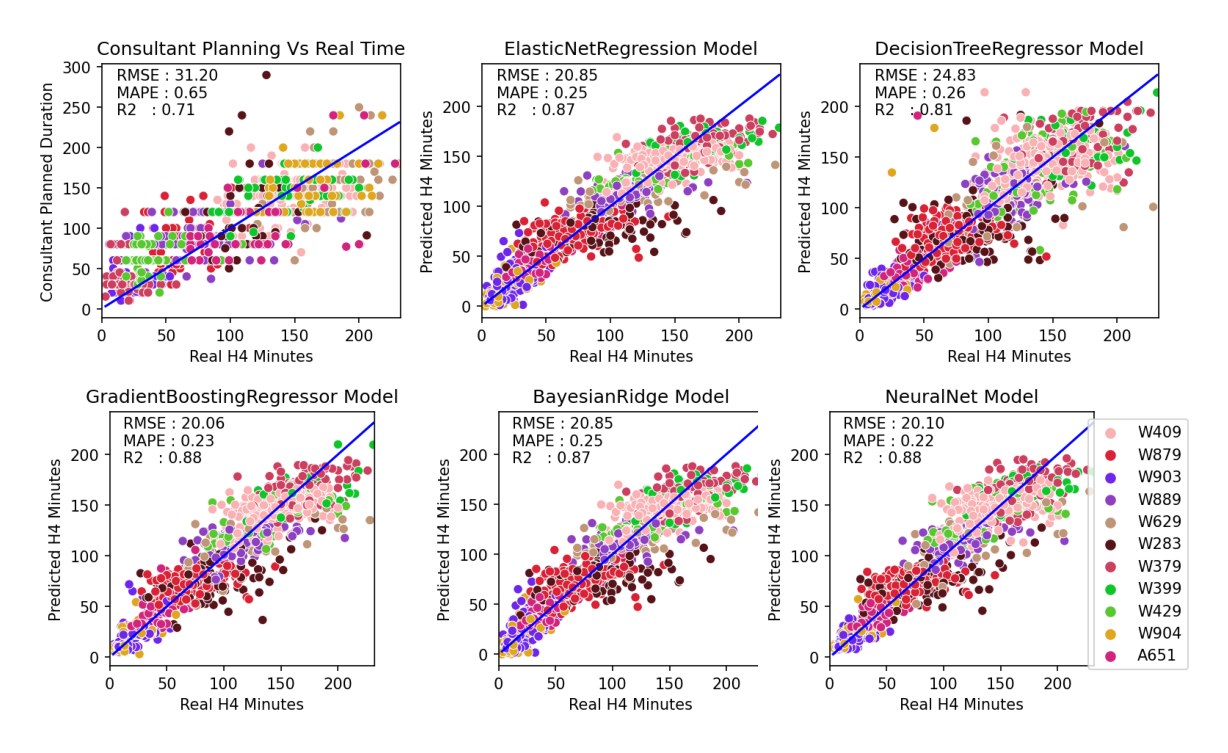

In [39]:
import matplotlib.pyplot as plt
new_fig, axes = plt.subplots(2,3, figsize=(6.5, 3),  gridspec_kw={'wspace': -0.5, 'hspace': 0.01}, dpi = 300)  # Adjust the size as needed

model_count = 0

#collected_axes = [current_status[-2] for _ in range(6)]
#collected_axes = [Test_res[0][-2] for _ in range(6)]


for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        #new_axis = axes[i,j]
        axes[i,j].set_axis_off()
        
        #old_axis = collected_axes[model_count]
        #old_axis.set_title(f'{models_types[model_count]} Model')
        #axes[i,j].imshow(collected_axes[model_count].figure.canvas.buffer_rgba(), origin='upper')
        #collected_figure[model_count].set_size_inches(3, 3)
        axes[i,j].imshow(collected_figure[model_count].canvas.buffer_rgba(), origin='upper')
        model_count+=1
        # Close the new figure to release resources
#plt.tight_layout()
plt.show()


In [40]:
new_fig.savefig(r'Output_files\All Models on Selected_procedures_Testing data.png', dpi=900)

Prediction Test Result 
 RMSE: 32.22
MAPE: 0.46
R2: 0.69


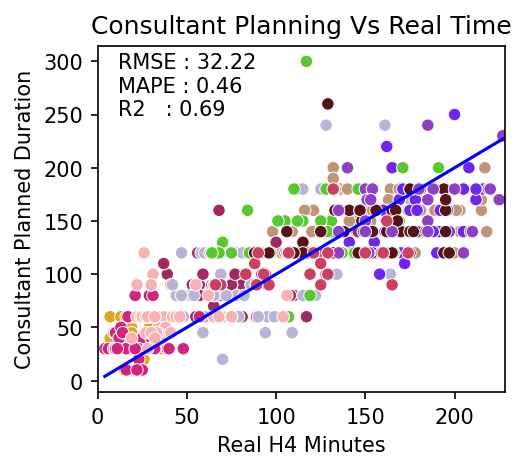

In [33]:
test_data_new = new_preprocessed_data[0].copy()
new_validation_data_selected = test_data_new[test_data_new['Actual Procedure 1 Code 1'].isin(selected_procedures_nd_orders)].copy()

new_validation_data_selected['Pseudo Procedure Code'] = new_validation_data_selected['Actual Procedure 1 Code 1'].map(order_mapping)

sorted_df = new_validation_data_selected.sort_values(by='Pseudo Procedure Code')
#sorted_df = sorted_df[sorted_df['Procedure Codes'].isin(selected_procedures_nd_orders)]
# Drop the SortOrder column if needed
#sorted_df.drop('SortOrder', axis=1, inplace=True)
current_status = plot_with_performance_test(' ', sorted_df['H4 Minutes'],sorted_df['Planned Duration'],sorted_df['Pseudo Procedure Code'], color_codes, 11, error_dist_plot = False)
current_status[-2].set_size_inches(3.5, 3)
current_status[-2].set_dpi(150)
current_status[-1].set_ylabel('Consultant Planned Duration')
#plot_results[-1].set_xlabel('Percentage Error')
current_status[-1].set_title('Consultant Planning Vs Real Time')
current_status[-1].get_legend().set_visible(False)
#plt.close()

Prediction Test Result 
 RMSE: 22.1
MAPE: 0.25
R2: 0.85
Prediction Test Result 
 RMSE: 23.92
MAPE: 0.25
R2: 0.83
Prediction Test Result 
 RMSE: 27.86
MAPE: 0.28
R2: 0.77
Prediction Test Result 
 RMSE: 28.95
MAPE: 0.24
R2: 0.75
Prediction Test Result 
 RMSE: 22.71
MAPE: 0.24
R2: 0.85
Prediction Test Result 
 RMSE: 23.08
MAPE: 0.22
R2: 0.84
Prediction Test Result 
 RMSE: 22.11
MAPE: 0.25
R2: 0.85
Prediction Test Result 
 RMSE: 23.91
MAPE: 0.25
R2: 0.83
Prediction Test Result 
 RMSE: 21.46
MAPE: 0.22
R2: 0.86
Prediction Test Result 
 RMSE: 23.79
MAPE: 0.22
R2: 0.83


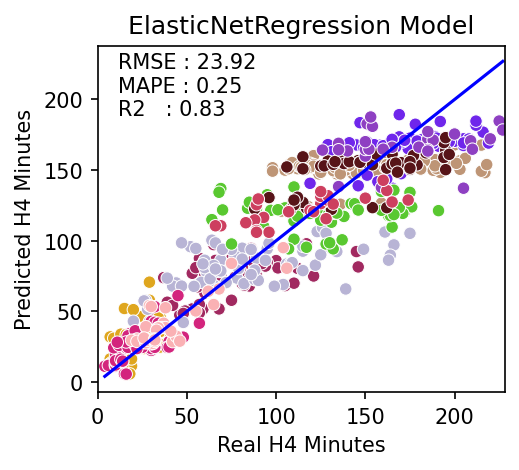

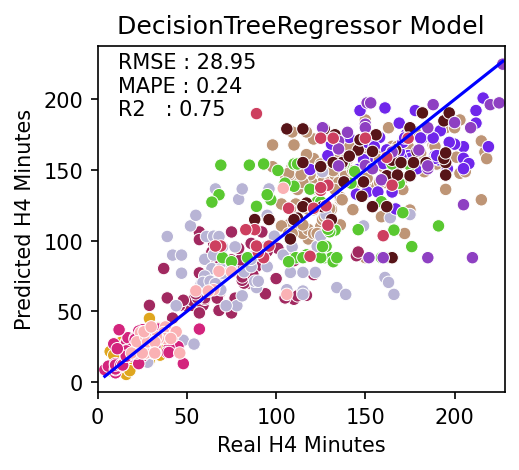

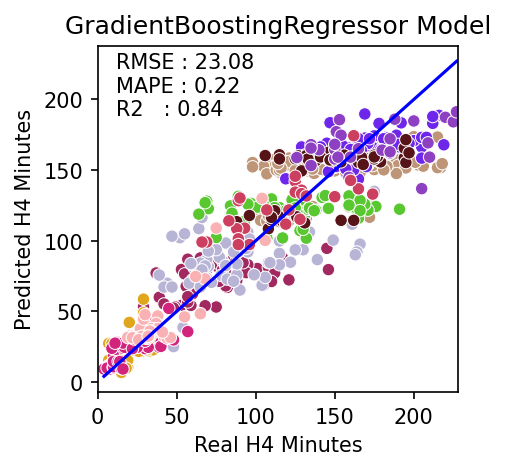

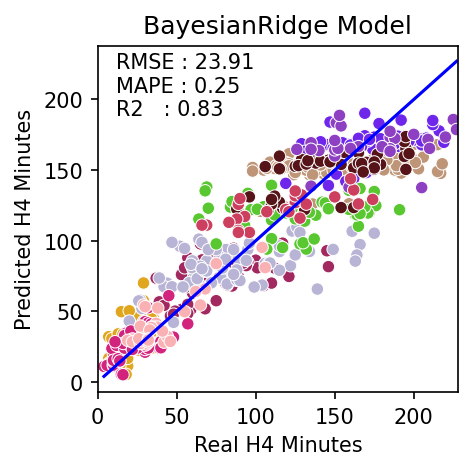

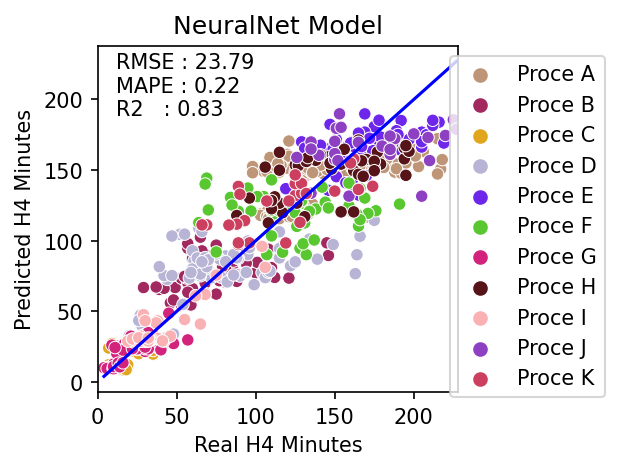

In [383]:
models_types = ['RegressionPipeline&ElNet','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']
#models_types = ['RegressionPipeline&ElNet','RegressionPipeline&ElNet','RegressionPipeline&ElNet']

models_tags = ['ElasticNetRegression','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']

model_retrain = False

#collected_axes =[]

collected_axes = [current_status[-1] for _ in range(1)]
#[current_status[-1]]

collected_figure = [current_status[-2] for _ in range(1)]

for idx, model_type in enumerate(models_types):
        
    training_related_parameters = get_model_training_related_parameters(model_type)

    Trained_res, _ = model_training_nd_testing_results(model_type, training_related_parameters, target_data_types,model_input_features_ess+model_input_features_addi, dict_for_data_model_categorisation, IO_datasets, model_retrain, False, residual_plot = False)

    procedure_code_data = identify_corresponding_feature(Trained_res[0][0],'Actual Procedure 1 Code 1',
                                                    dict_for_data_model_categorisation, {},Trained_res[0][-2])
    if model_type != 'BayesianRidge':
        y_predict = predict_with_model(model_type,Trained_res[0][1], IO_datasets_new[0][0].reindex(columns=Trained_res[0][-2].columns, fill_value=0))
    else:
        y_predict = predict_with_model(model_type,Trained_res[0][1], IO_datasets_new[0][0].reindex(columns=Trained_res[0][-2].columns, fill_value=0))[0]
        
    df1 = pd.DataFrame({'Actual Procedure 1 Code 1': new_preprocessed_data[0]['Actual Procedure 1 Code 1'], 
                        'Predicted H4 Minutes': y_predict})
    df1 = pd.concat([df1, IO_datasets_new[0][1]], axis=1)

    data_selected = df1[df1['Actual Procedure 1 Code 1'].isin(selected_procedures_nd_orders)].copy()

    # Apply the sorting order using the key parameter
    data_selected['Pseudo Procedure Code'] = data_selected['Actual Procedure 1 Code 1'].map(order_mapping)
    
    sorted_df = data_selected.sort_values(by='Pseudo Procedure Code')
    
    #ordered_labels = preprocess_result[0][1]['Actual Procedure 1 Code 1'].value_counts().index.tolist()
    [temp_fig, temp_axis] = plot_with_performance_test1(' ', sorted_df['H4 Minutes'],sorted_df['Predicted H4 Minutes'],sorted_df['Pseudo Procedure Code'], color_codes, 11)[-2:]
    
    temp_axis.set_title(f'{models_tags[idx]} Model')
    if idx < 2:
        temp_fig.set_size_inches(3.5, 3)
    else:
        temp_fig.set_size_inches(3.1, 3)
    temp_fig.set_dpi(150)
    if idx <len(models_types)-1:
        temp_axis.get_legend().set_visible(False)
    else:
        temp_axis.legend(bbox_to_anchor=(0.95, 1), loc='upper left')
    
    collected_axes.append(temp_axis)

    collected_figure.append(temp_fig)
    #collected_figure.append(Test_res[0][-2])

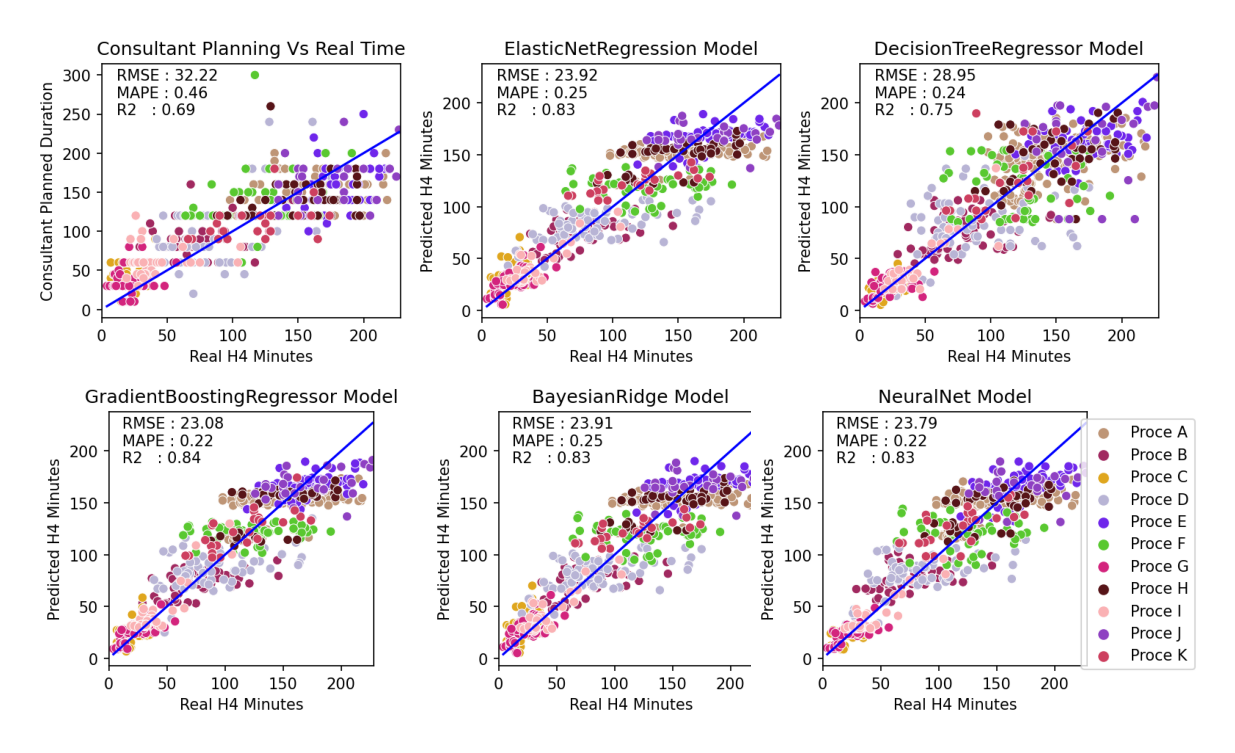

In [384]:
import matplotlib.pyplot as plt
new_fig, axes = plt.subplots(2,3, figsize=(6.5, 3),  gridspec_kw={'wspace': -0.5, 'hspace': 0.01}, dpi = 300)  # Adjust the size as needed

model_count = 0

#collected_axes = [current_status[-2] for _ in range(6)]
#collected_axes = [Test_res[0][-2] for _ in range(6)]


for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        #new_axis = axes[i,j]
        axes[i,j].set_axis_off()
        
        #old_axis = collected_axes[model_count]
        #old_axis.set_title(f'{models_types[model_count]} Model')
        #axes[i,j].imshow(collected_axes[model_count].figure.canvas.buffer_rgba(), origin='upper')
        #collected_figure[model_count].set_size_inches(3, 3)
        axes[i,j].imshow(collected_figure[model_count].canvas.buffer_rgba(), origin='upper')
        model_count+=1
        # Close the new figure to release resources
#plt.tight_layout()
plt.show()


In [385]:
new_fig.savefig(r'Output_files\All Models on Selected_procedures_Validating data.png', dpi=500)

### Performance of Categorical Modelling on Testing data

In [12]:
from predictive_model_related_functions import category_based_modelling

In [16]:
#color_codes

Prediction Test Result 
 RMSE: 30.62
MAPE: 0.71
R2: 0.72


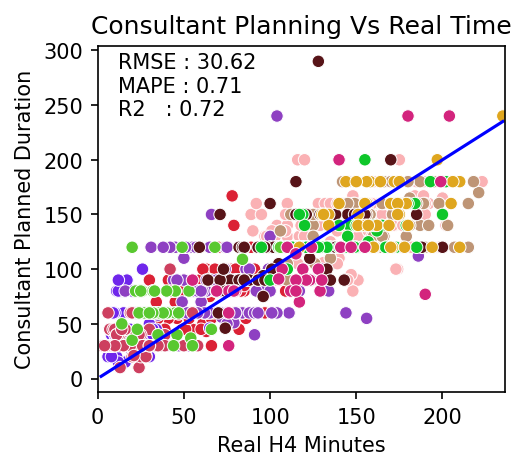

In [20]:
test_data_selected = test_data[test_data['Actual Procedure 1 Code 1'].isin(selected_procedures_nd_orders)].copy()

# Apply the sorting order using the key parameter
test_data_selected['Pseudo Procedure Code'] = test_data_selected['Actual Procedure 1 Code 1'].map(order_mapping)

sorted_df = test_data_selected.sort_values(by='Pseudo Procedure Code')
#sorted_df = sorted_df[sorted_df['Procedure Codes'].isin(selected_procedures_nd_orders)]
# Drop the SortOrder column if needed
#sorted_df.drop('SortOrder', axis=1, inplace=True)
current_status = plot_with_performance_test(' ', sorted_df['H4 Minutes'],sorted_df['Planned Duration'],sorted_df['Actual Procedure 1 Code 1'], color_codes, 11, error_dist_plot = False)
current_status[-2].set_size_inches(3.5, 3)
current_status[-2].set_dpi(150)
current_status[-1].set_ylabel('Consultant Planned Duration')
#plot_results[-1].set_xlabel('Percentage Error')
current_status[-1].set_title('Consultant Planning Vs Real Time')
current_status[-1].get_legend().set_visible(False)

model categorised for dict_values(['COL', 'Trauma & Orthopaedics', 'W409']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 21.41
MAPE: 0.12
R2: 0.36
model categorised for dict_values(['COL', 'Trauma & Orthopaedics', 'W879']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 17.96
MAPE: 0.21
R2: 0.16
model categorised for dict_values(['COL', 'Trauma & Orthopaedics', 'W903']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 8.47
MAPE: 0.45
R2: 0

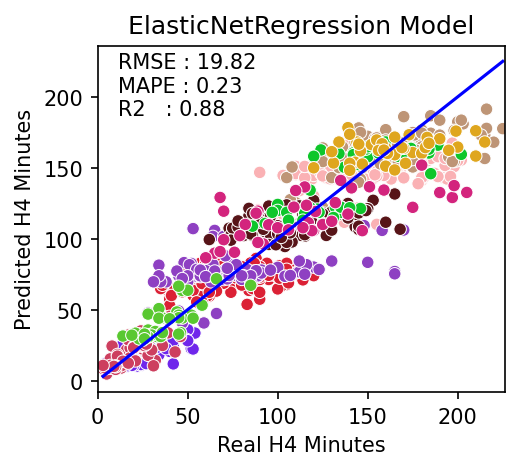

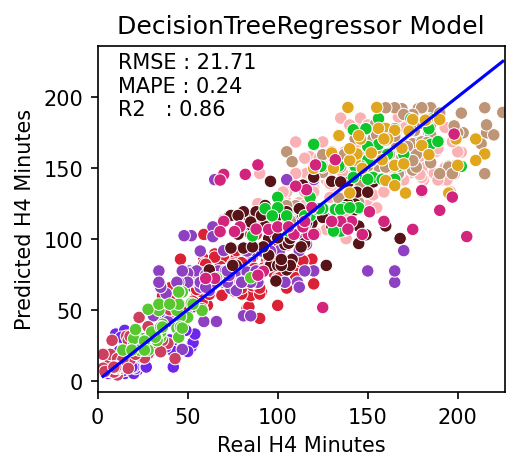

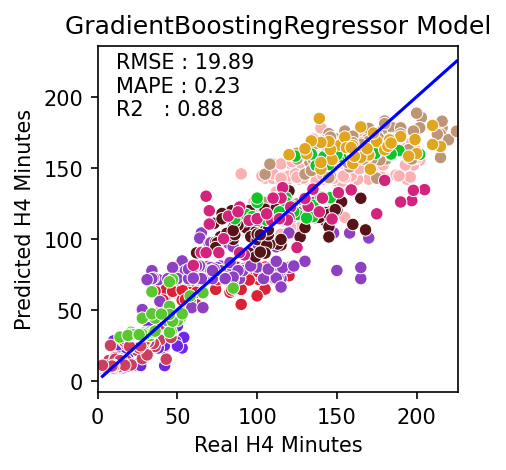

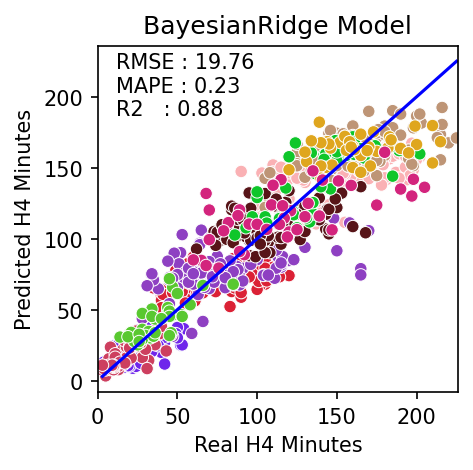

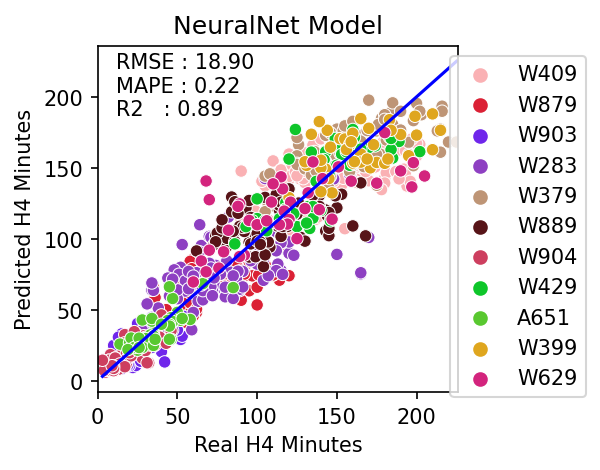

In [22]:
from predictive_model_related_functions import identify_corresponding_feature, predict_with_model, plot_with_performance_test

models_types = ['RegressionPipeline&ElNet','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']
#models_types = ['RegressionPipeline&ElNet','RegressionPipeline&ElNet','RegressionPipeline&ElNet']

models_tags = ['ElasticNetRegression','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']

model_retrain = False

#collected_axes =[]

collected_axes = [current_status[-1]]
#[current_status[-1]]

collected_figure = [current_status[-2]]

for idx, model_type in enumerate(models_types):
        
    training_related_parameters = get_model_training_related_parameters(model_type)

    min_data_req_for_further_catego = {'Actual Procedure 1 Code 1': 190}
    
    model_retrain = False
    
    force_one_hot_encoding_cols = ['N_procedures']
    
    essen_data_categ = {'Hosp':'COL','Specialty':'Trauma & Orthopaedics'}
    #Z_score_threshold_for_outlier_removal = 1.5
    min_count_threshold_for_filtering = {'Actual Procedure 1 Code 1':5}
    
    Z_score_for_outlier_removal = {'overall':2.8, 'Actual Procedure 1 Code 1':1.8}
    
    Trained_Test_result = category_based_modelling(data_file, essen_data_categ, model_input_features_ess, model_input_features_addi,
                                                   target_data_types, min_count_threshold_for_filtering, Z_score_for_outlier_removal, force_one_hot_encoding_cols, model_type,training_related_parameters ,
                                                   min_data_req_for_further_catego, model_retrain, skip_modelling_if_no_categorisation = True)

    y_real = [ ]
    y_pred = []
    coloring_features_labels = []
    for train_test_res in Trained_Test_result:
        train_res = train_test_res[0][0]
        #y_real.append(train_res[-1])
        y_real.extend(train_res[-1])
        if model_type != 'BayesianRidge':
            y_pred.extend(list(predict_with_model(model_type, train_res[1], train_res[-2])))
        else:
            y_pred.extend(list(predict_with_model(model_type, train_res[1], train_res[-2])[0]))
            
        coloring_features_labels.extend(identify_corresponding_feature(train_res[0], 'Actual Procedure 1 Code 1', essen_data_categ, min_data_req_for_further_catego, train_res[-2]))

    df2 = pd.DataFrame({'Actual Procedure 1 Code 1': coloring_features_labels, 
                    'Predicted H4 Minutes': y_pred,
                   'H4 Minutes' : y_real})

    data_selected = df2[df2['Actual Procedure 1 Code 1'].isin(selected_procedures_nd_orders)].copy()

    # Apply the sorting order using the key parameter
    data_selected['Pseudo Procedure Code'] = data_selected['Actual Procedure 1 Code 1'].map(order_mapping)
    
    sorted_df = data_selected.sort_values(by='Pseudo Procedure Code')
    
    #ordered_labels = preprocess_result[0][1]['Actual Procedure 1 Code 1'].value_counts().index.tolist()
    [temp_fig, temp_axis] = plot_with_performance_test(' ', sorted_df['H4 Minutes'],sorted_df['Predicted H4 Minutes'],sorted_df['Actual Procedure 1 Code 1'], color_codes, 11, error_dist_plot = False)[-2:]

    temp_axis.set_title(f'{models_tags[idx]} Model')
    if idx < 2:
        temp_fig.set_size_inches(3.5, 3)
    else:
        temp_fig.set_size_inches(3.1, 3)
    temp_fig.set_dpi(150)
    if idx <len(models_types)-1:
        temp_axis.get_legend().set_visible(False)
    else:
        temp_axis.legend(bbox_to_anchor=(0.95, 1), loc='upper left')

    collected_axes.append(temp_axis)

    collected_figure.append(temp_fig)

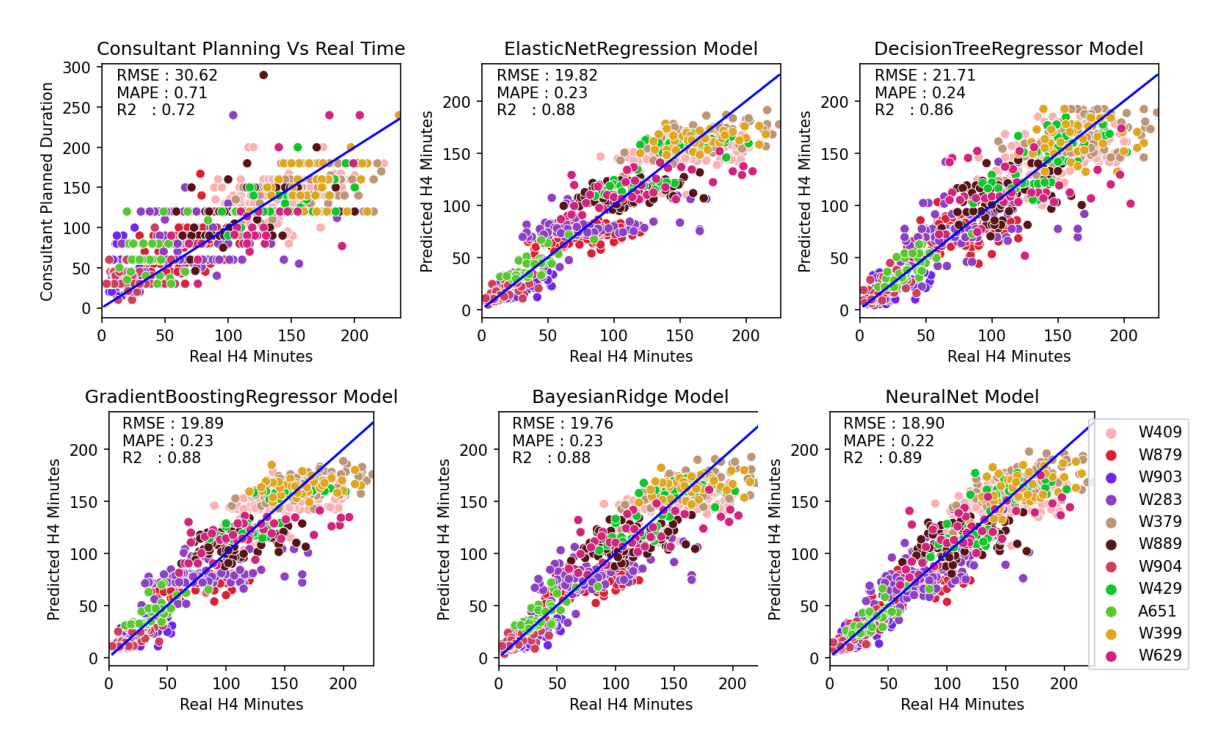

In [23]:
import matplotlib.pyplot as plt
new_fig, axes = plt.subplots(2,3, figsize=(6.5, 3),  gridspec_kw={'wspace': -0.5, 'hspace': 0.01}, dpi = 300)  # Adjust the size as needed

model_count = 0

#collected_axes = [current_status[-2] for _ in range(6)]
#collected_axes = [Test_res[0][-2] for _ in range(6)]


for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        #new_axis = axes[i,j]
        axes[i,j].set_axis_off()
        axes[i,j].imshow(collected_figure[model_count].canvas.buffer_rgba(), origin='upper')
        model_count+=1
        # Close the new figure to release resources
#plt.tight_layout()
plt.show()

In [24]:
new_fig.savefig(r'Output_files\Categorical Models for Selected_procedures_Testing data2.png', dpi=500)

### Performance of Categorical Modelling on Validation data

In [11]:
from predictive_model_related_functions import category_based_modelling

Prediction Test Result 
 RMSE: 32.22
MAPE: 0.46
R2: 0.69


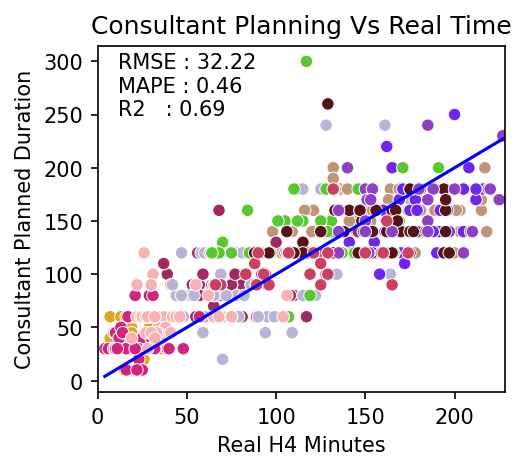

In [28]:
new_validation_data_selected = new_preprocessed_data[0][new_preprocessed_data[0]['Actual Procedure 1 Code 1'].isin(selected_procedures_nd_orders)].copy()

new_validation_data_selected['Pseudo Procedure Code'] = new_validation_data_selected['Actual Procedure 1 Code 1'].map(order_mapping)

sorted_df = new_validation_data_selected.sort_values(by='Pseudo Procedure Code')
#sorted_df = sorted_df[sorted_df['Procedure Codes'].isin(selected_procedures_nd_orders)]
# Drop the SortOrder column if needed
#sorted_df.drop('SortOrder', axis=1, inplace=True)
current_status = plot_with_performance_test(' ', sorted_df['H4 Minutes'],sorted_df['Planned Duration'],sorted_df['Pseudo Procedure Code'], color_codes, 11, error_dist_plot = False)
current_status[-2].set_size_inches(3.5, 3)
current_status[-2].set_dpi(150)
current_status[-1].set_ylabel('Consultant Planned Duration')
#plot_results[-1].set_xlabel('Percentage Error')
current_status[-1].set_title('Consultant Planning Vs Real Time')
current_status[-1].get_legend().set_visible(False)

model categorised for dict_values(['COL', 'Trauma & Orthopaedics', 'W409']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 21.41
MAPE: 0.12
R2: 0.36
model categorised for dict_values(['COL', 'Trauma & Orthopaedics', 'W879']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 17.96
MAPE: 0.21
R2: 0.16
model categorised for dict_values(['COL', 'Trauma & Orthopaedics', 'W903']) with input features ['Consultant Code', 'Age group at admit', 'Gender', 'Anaesthetist Count', 'Day of the week', 'Covid Flag', 'N_procedures', 'Obesity', 'anaesthetist Expected?', 'Theatre Suite Name']
Prediction Test Result 
 RMSE: 8.47
MAPE: 0.45
R2: 0

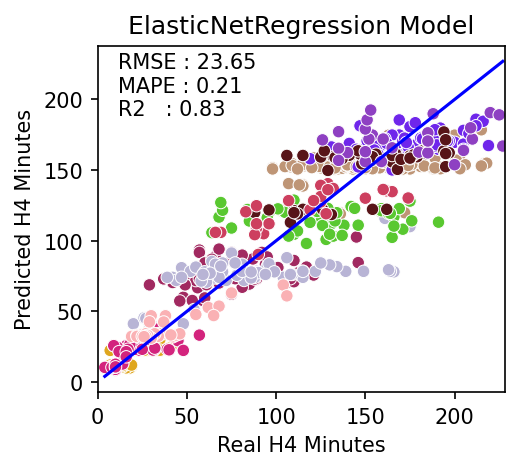

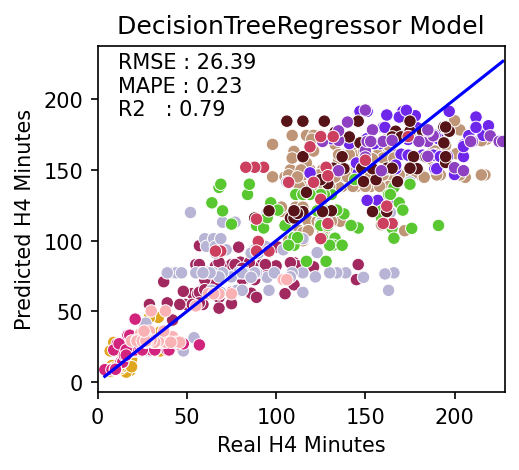

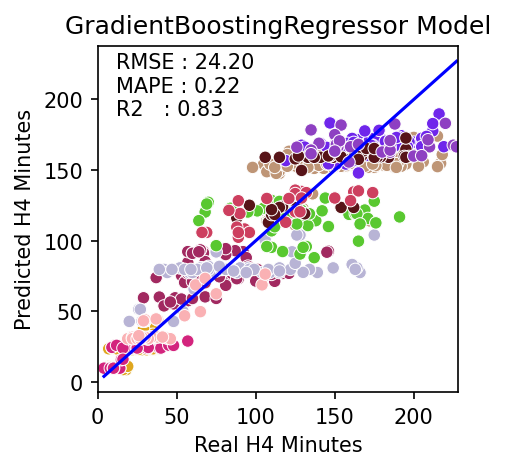

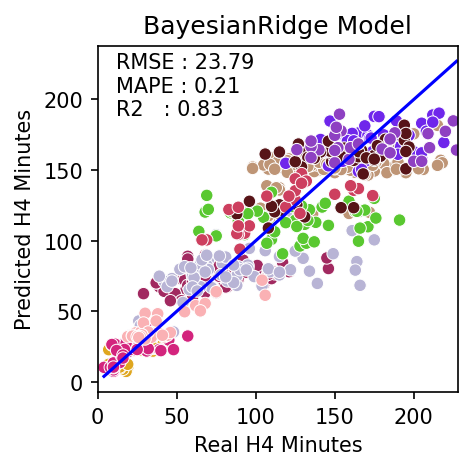

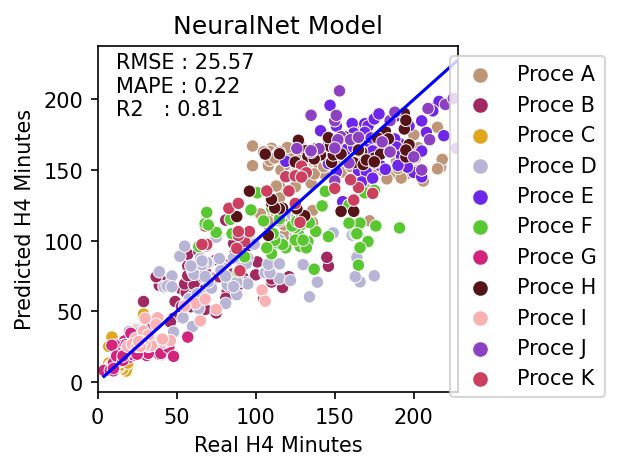

In [29]:
from predictive_model_related_functions import identify_corresponding_feature, predict_with_model, plot_with_performance_test

models_types = ['RegressionPipeline&ElNet','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']
#models_types = ['RegressionPipeline&ElNet']

models_tags = ['ElasticNetRegression','DecisionTreeRegressor','GradientBoostingRegressor','BayesianRidge','NeuralNet']

model_retrain = False

#collected_axes =[]

collected_axes = [current_status[-1]]
#[current_status[-1]]
#collected_figure = []
collected_figure = [current_status[-2]]

for idx, model_type in enumerate(models_types):
        
    training_related_parameters = get_model_training_related_parameters(model_type)

    min_data_req_for_further_catego = {'Actual Procedure 1 Code 1': 150}
    
    model_retrain = False
    
    force_one_hot_encoding_cols = ['N_procedures']
    
    essen_data_categ = {'Hosp':'COL','Specialty':'Trauma & Orthopaedics'}
    #Z_score_threshold_for_outlier_removal = 1.5
    min_count_threshold_for_filtering = {'Actual Procedure 1 Code 1':5}
    
    Z_score_for_outlier_removal = {'overall':2.8, 'Actual Procedure 1 Code 1':1.8}
    
    Trained_Test_result = category_based_modelling(data_file, essen_data_categ, model_input_features_ess, model_input_features_addi,
                                                   target_data_types, min_count_threshold_for_filtering, Z_score_for_outlier_removal, force_one_hot_encoding_cols, model_type,training_related_parameters ,
                                                   min_data_req_for_further_catego, model_retrain, skip_modelling_if_no_categorisation = True, log_transform= False)

    y_real = [ ]
    y_pred = []
    coloring_features_labels = []
    for train_test_res in Trained_Test_result:
        
        train_res = train_test_res[0][0]
        #y_real.append(train_res[-1])

        related_feature = train_res[0].split('_')[-2]
        if not related_feature in selected_procedures_nd_orders:
            continue
    
        selected_data = new_preprocessed_data[0][new_preprocessed_data[0]['Actual Procedure 1 Code 1']==related_feature]
        
        selected_data = selected_data.drop(columns = ['Actual Procedure 1 Code 1','Planned Duration'])
        
        IO_selected_data_new = prepare_IO_dataset([selected_data], 'one-hot', force_one_hot_encoding_cols)

        y_real.extend(IO_selected_data_new[0][1])
        
        if model_type != 'BayesianRidge':
            y_pred.extend(list(predict_with_model(model_type, train_res[1], IO_selected_data_new[0][0].reindex(columns=train_res[-2].columns, fill_value=0))))
        else:
            y_pred.extend(list(predict_with_model(model_type, train_res[1], IO_selected_data_new[0][0].reindex(columns=train_res[-2].columns, fill_value=0))[0]))
            
        coloring_features_labels.extend([related_feature for _ in range(len(IO_selected_data_new[0][1]))])

    df2 = pd.DataFrame({'Actual Procedure 1 Code 1': coloring_features_labels, 
                    'Predicted H4 Minutes': y_pred,
                   'H4 Minutes' : y_real})

    data_selected = df2[df2['Actual Procedure 1 Code 1'].isin(selected_procedures_nd_orders)].copy()

    # Apply the sorting order using the key parameter
    data_selected['Pseudo Procedure Code'] = data_selected['Actual Procedure 1 Code 1'].map(order_mapping)
    
    data_selected = data_selected.sort_values(by='Pseudo Procedure Code')
    
    #ordered_labels = preprocess_result[0][1]['Actual Procedure 1 Code 1'].value_counts().index.tolist()
    [temp_fig, temp_axis] = plot_with_performance_test(' ', data_selected['H4 Minutes'],data_selected['Predicted H4 Minutes'],data_selected['Pseudo Procedure Code'], color_codes, 11, error_dist_plot = False)[-2:]

    temp_axis.set_title(f'{models_tags[idx]} Model')
    if idx < 2:
        temp_fig.set_size_inches(3.5, 3)
    else:
        temp_fig.set_size_inches(3.1, 3)
    temp_fig.set_dpi(150)
    if idx <len(models_types)-1:
        temp_axis.get_legend().set_visible(False)
    else:
        temp_axis.legend(bbox_to_anchor=(0.95, 1), loc='upper left')

    collected_axes.append(temp_axis)

    collected_figure.append(temp_fig)

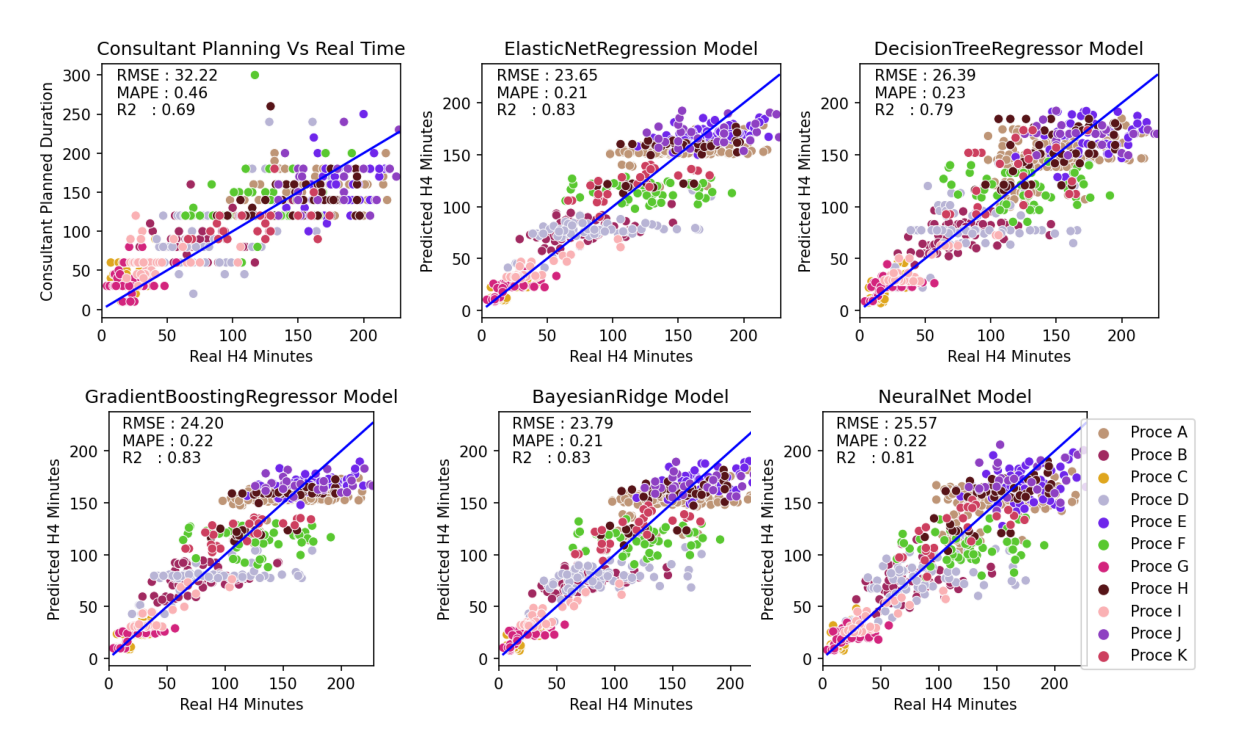

In [34]:
import matplotlib.pyplot as plt
new_fig, axes = plt.subplots(2,3, figsize=(6.5, 3),  gridspec_kw={'wspace': -0.5, 'hspace': 0.01}, dpi = 300)  # Adjust the size as needed

model_count = 0

#collected_axes = [current_status[-2] for _ in range(6)]
#collected_axes = [Test_res[0][-2] for _ in range(6)]


for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        #new_axis = axes[i,j]
        axes[i,j].set_axis_off()
        axes[i,j].imshow(collected_figure[model_count].canvas.buffer_rgba(), origin='upper')
        model_count+=1
        # Close the new figure to release resources
#plt.tight_layout()
plt.show()

In [35]:
new_fig.savefig(r'Output_files\Categorical Models for Selected_procedures_Validation data.png', dpi=500)

In [33]:
#new_preprocessed_data[0]

### Functions updated

In [369]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import seaborn as sns
import random

def plot_with_performance_test1(model_name,  y_test,  y_pred, color_data = None, category_colors = None, 
                                max_legend_entries = None, error_dist_plot = False, only_error_plot = False):

    def assign_color(label):
        if label not in category_colors:
            # Assign a new color for the label
            color = tuple(random.random() for _ in range(3))
            category_colors[label] = color
        
        return category_colors[label]

    
    # Find mean squared error, root and negate it - this should be very similar to best score above if model is not over/under fit
    test_rmse = round(np.sqrt(mean_squared_error(y_test, np.abs(y_pred))), 2)
    #normalised_rmse = round(test_rmse / (max(y_test) - min(y_test) + 1e-10), 2)
    mean_absolute_percentage_error = round(np.mean(np.abs((y_test - np.abs(y_pred)) / y_test)),2)
    # Find r2
    r2 = round(r2_score(y_test, np.abs(y_pred)), 2)

    print('Prediction Test Result \n RMSE: ' + str(test_rmse))
    print('MAPE: ' + str(mean_absolute_percentage_error))
    print('R2: ' + str(r2))
    
    if error_dist_plot:
        errors = (y_test - np.abs(y_pred)) / y_test
        
        if only_error_plot:
            fig, ax2 = plt.subplots()
        else:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
    else:
        fig, ax1 = plt.subplots()

    #setting palett setting
    if color_data is not None:
    
        if category_colors is not None:
            colors = [assign_color(category) for category in np.unique(color_data)]
            palett = sns.color_palette(colors)
        else:
            palett='Set1'
                        

    if not only_error_plot:
        if category_colors is not None:
            sns.scatterplot(x=y_test, y=np.abs(y_pred), hue=color_data, palette=palett, 
                            edgecolors='white', ax=ax1).set(title=f"{model_name}'s prediction \n vs Actual Time")
        else:
            sns.scatterplot(x=y_test, y=np.abs(y_pred), color="orange",edgecolors='white', ax=ax1).set(title=f"{model_name}'s prediction \n vs Actual Time")
        
        ax1.set_ylabel(f"Predicted {y_test.name}")
        ax1.set_xlabel(f"Real {y_test.name}")
        sns.lineplot(x=y_test, y=y_test, color='blue', ax=ax1)
        metrics_str = f"RMSE : {test_rmse:.2f}\nMAPE : {mean_absolute_percentage_error:.2f}\nR2   : {r2:.2f}"
        #ax1.text(0.05, 0.90 , f'RMSE   : {test_rmse}', transform=ax1.transAxes)
        #ax1.text(0.05, 0.84, f'MAPE   : {mean_absolute_percentage_error}', transform=ax1.transAxes)
        #ax1.text(0.05, 0.78, f'R2      : {r2}', transform=ax1.transAxes)
        ax1.text(0.05, 0.80, metrics_str, transform=ax1.transAxes)
        
        ax1.set_xlim(0,max(y_test)+1)
    
    if error_dist_plot:
        if color_data is None:
            errors = [x for x in errors if -1.5 <= x <= 1.5]
            ax2.hist(errors, bins=30, edgecolor='k', color='red', alpha=0.7)
            # Calculate metrics
            mean = np.mean(errors)
            median = np.median(errors)
            modes = stats.mode(errors)
            #mode_values = modes.mode
            std_dev = np.std(errors)
            skew = stats.skew(errors)
            kurtosis = stats.kurtosis(errors)
            
            # Convert mode_values to a string
            #mode_str = ', '.join(map(str, mode_values)) if len(modes)/2 > 1 else f"{mode_values:.2f}"

            
            # Print the metrics
            metrics_str = f"Mean      : {mean:.2f}\nMedian   : {median:.2f}\nStd dev   : {std_dev:.2f}\nSkewness: {skew:.2f}\nKurtosis  : {kurtosis:.2f}"
            ax2.text(0.05, 0.72, metrics_str, transform=ax2.transAxes)
            ax2.set_ylabel('Frequency')
        else:
            data = pd.DataFrame({'Errors': errors, 'Category': color_data})
            data = data[(data['Errors'] >= -1.5) & (data['Errors'] <=1.5 )]
            sns.kdeplot(data=data, x='Errors', hue='Category', common_norm=False, ax=ax2, alpha=0.7, fill=False, legend=True,  palette='Set1')
            sns.kdeplot(data=errors, ax=ax2, label='Overall', color='black', linestyle='--')

            
            #sns.histplot(data=data, x='Errors', hue='Category', bins=60, element='step', common_norm=False, kde=True, ax=ax2, alpha=0.7)
            ax2.set_ylabel('Density')
            
        ax2.set_xlabel('Relative Error')
        ax2.set_title('Distribution of Errors')
        ax2.set_xlim([-1.5, 1.5])
        
        # Adjust layout to prevent overlapping
        plt.tight_layout()
    
    if not only_error_plot and color_data is not None:
        # Get the unique data types and their counts
        unique_data_types, data_type_counts = np.unique(color_data, return_counts=True)

        # Limit the number of legend entries if there are more than max_legend_entries unique data types
        if len(unique_data_types) > max_legend_entries:
            ncol = 2  # Specify the number of columns for the legend
            handles, labels = ax1.get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
           # Sort the data types by count in descending order
            sorted_data_types = sorted(unique_data_types, key=lambda x: data_type_counts[np.where(unique_data_types == x)[0][0]], reverse=True)

            # Get the top max_legend_entries data types and their corresponding handles
            selected_labels = [label for label in sorted_data_types[:max_legend_entries] if label in by_label]
            selected_handles = [by_label[label] for label in selected_labels]

            ax1.legend(selected_handles, selected_labels, ncol=ncol, bbox_to_anchor=(1, 0), loc='lower right')
        else:
            ax1.legend(bbox_to_anchor=(1, 0), loc='lower right')
    
    if error_dist_plot:
        if only_error_plot:
            return [ fig, ax2]
        else:    
            return [test_rmse, mean_absolute_percentage_error, r2, fig, ax1, ax2]
    else:
        return [test_rmse, mean_absolute_percentage_error, r2, fig, ax1]

        
         

In [ ]:
if 

In [20]:
from torch.utils.data import Dataset, DataLoader

In [21]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(dataset: torch.utils.data.dataset.Dataset[+T_co], batch_size: Optional[int] = 1, shuffle: Optional[bool] = None, sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None, batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None, num_workers: int = 0, collate_fn: Optional[Callable[[List[~T]], Any]] = None, pin_memory: bool = False, drop_last: bool = False, timeout: float = 0, worker_init_fn: Optional[Callable[[int], NoneType]] = None, multiprocessing_context=None, generator=None, *, prefetch_factor: Optional[int] = None, persistent_workers: bool = False, pin_memory_device: str = '')
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-proc

In [24]:
help(torch.nn.parallel)

Help on package torch.nn.parallel in torch.nn:

NAME
    torch.nn.parallel

PACKAGE CONTENTS
    _functions
    comm
    data_parallel
    distributed
    parallel_apply
    replicate
    scatter_gather

CLASSES
    torch.distributed.algorithms.join.Joinable(abc.ABC)
        torch.nn.parallel.distributed.DistributedDataParallel(torch.nn.modules.module.Module, torch.distributed.algorithms.join.Joinable)
    torch.nn.modules.module.Module(builtins.object)
        torch.nn.parallel.data_parallel.DataParallel(torch.nn.modules.module.Module, typing.Generic)
        torch.nn.parallel.distributed.DistributedDataParallel(torch.nn.modules.module.Module, torch.distributed.algorithms.join.Joinable)
    typing.Generic(builtins.object)
        torch.nn.parallel.data_parallel.DataParallel(torch.nn.modules.module.Module, typing.Generic)
    
    class DataParallel(torch.nn.modules.module.Module, typing.Generic)
     |  DataParallel(module: ~T, device_ids: Optional[Sequence[Union[int, torch.device]]] 

In [25]:
help(torch.nn.Module.train)

Help on function train in module torch.nn.modules.module:

train(self: ~T, mode: bool = True) -> ~T
    Sets the module in training mode.
    
    This has any effect only on certain modules. See documentations of
    particular modules for details of their behaviors in training/evaluation
    mode, if they are affected, e.g. :class:`Dropout`, :class:`BatchNorm`,
    etc.
    
    Args:
        mode (bool): whether to set training mode (``True``) or evaluation
                     mode (``False``). Default: ``True``.
    
    Returns:
        Module: self



In [27]:
x = torch.tensor(IO_datasets[0][1], dtype=torch.float32)

In [29]:
x.numpy()[0]

65.0

In [30]:
a, b = [1,2]

In [32]:
b

2

In [33]:
from concurrent.futures import ThreadPoolExecutor, as_completed